# Purchase Predictor EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets/Customers_Dataset.csv")
df.shape

(84956, 20)

In [3]:
# df = df[~(df['consultant_id'].isin([83, 26])&(df.state=='lost'))]
# df.state.value_counts()

In [116]:
plot_df.isna().sum()

state                    0
consultant_id         1360
life_aspect              0
category_name           10
customer_id              0
gender                 565
age                    572
family_status        20859
kids                 20905
income               21490
mkt_channel              0
employment               0
city                   595
count_phone_calls     2893
dtype: int64

In [5]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.shape

(84956, 20)

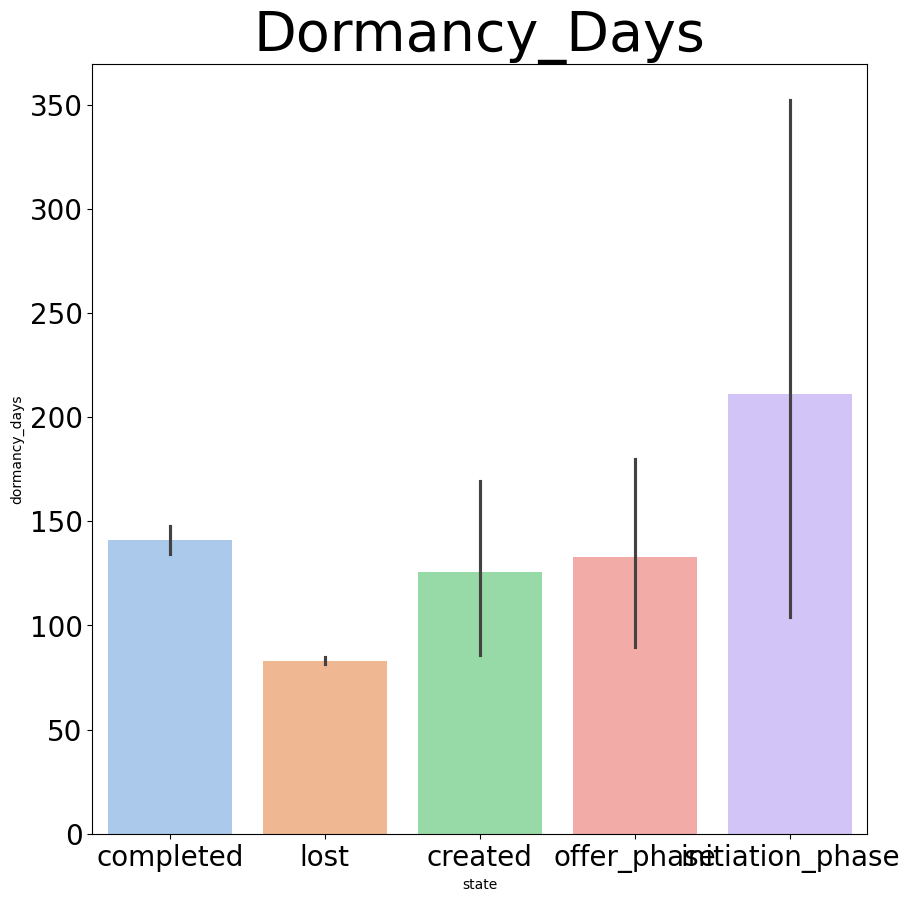

In [33]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['registered_at'] = pd.to_datetime(df['registered_at'])
plt.figure(figsize=(10, 10))

df['dormancy_days'] = (df['created_at'] - df['registered_at']).dt.days

sns.barplot(data=df, y=df.dormancy_days, x=df.state, palette='pastel', legend=True)
plt.title('Dormancy_Days',fontsize=40) 

plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.savefig('plots/dormancydays.png')
plt.show()

In [117]:
df = df.loc[(df.state == 'completed') | ((df.state == 'lost'))]
# df['state'] = df['state'].replace({'completed': 1, 'lost': 0})
df.state.value_counts()

state
lost         77835
completed     6747
Name: count, dtype: int64

In [7]:
plot_df = df.drop(columns =['id', 'created_at', 'assign_at', 'complete_at', 'lost_at','registered_at'])

## Uniqueness

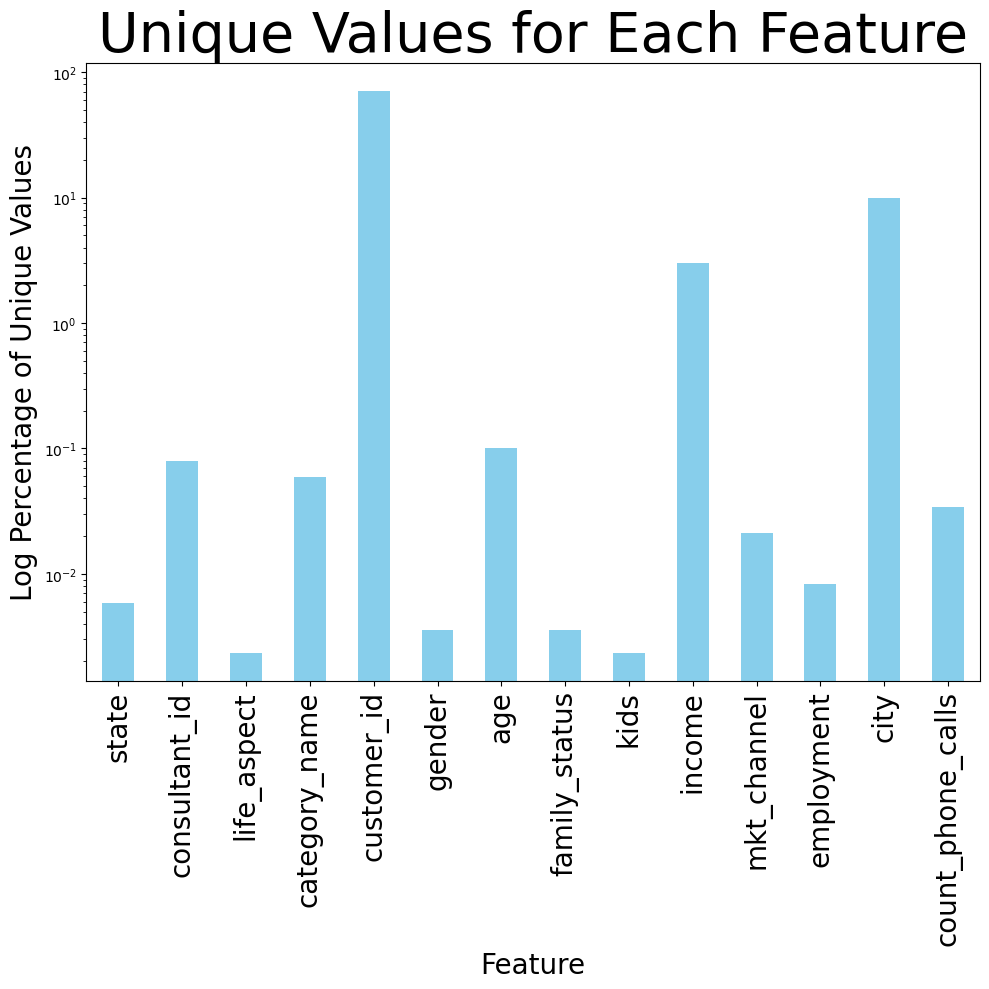

In [32]:
unique_values = (plot_df.nunique() / len(plot_df)) * 100
plt.figure(figsize=(10, 10))
unique_values.plot(kind='bar', color='skyblue')
plt.title('Unique Values for Each Feature', fontsize=40) 
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Log Percentage of Unique Values',fontsize=20) 
plt.yscale('log')
plt.xticks(rotation=90, fontsize=20)
plt.tight_layout() 

plt.savefig('plots/unique.png')
plt.show()

## Percenatge of Nulls

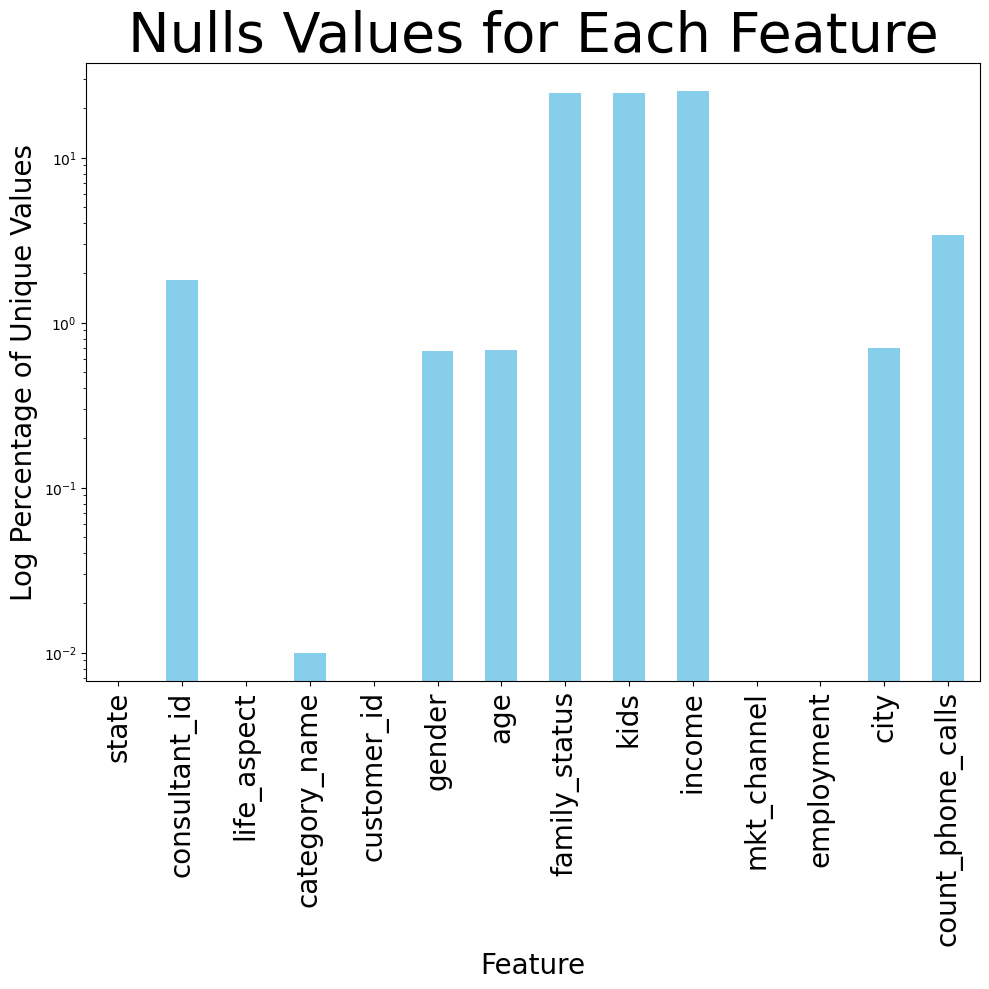

In [31]:

null_values = (plot_df.isna().mean() * 100).round(2)
plt.figure(figsize=(10, 10))
null_values.plot(kind='bar', color='skyblue')
plt.title('Nulls Values for Each Feature', fontsize=40) 
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Log Percentage of Unique Values',fontsize=20) 
plt.yscale('log')
plt.xticks(rotation=90, fontsize=20)
plt.tight_layout() 
plt.savefig('plots/nulls.png')
plt.show()


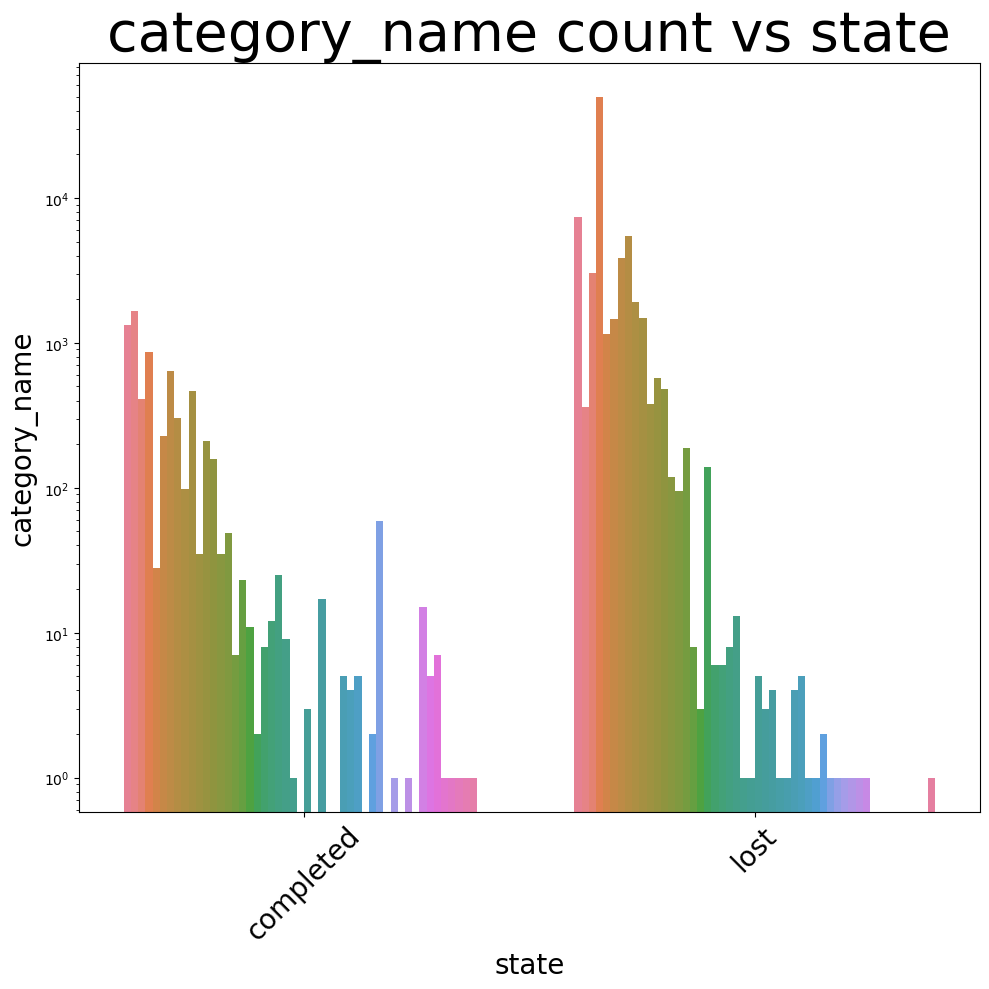

In [8]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.category_name, legend=False)

plt.title('category_name count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('category_name',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
plt.tight_layout() 

plt.savefig('plots/plot1.png')

plt.show()

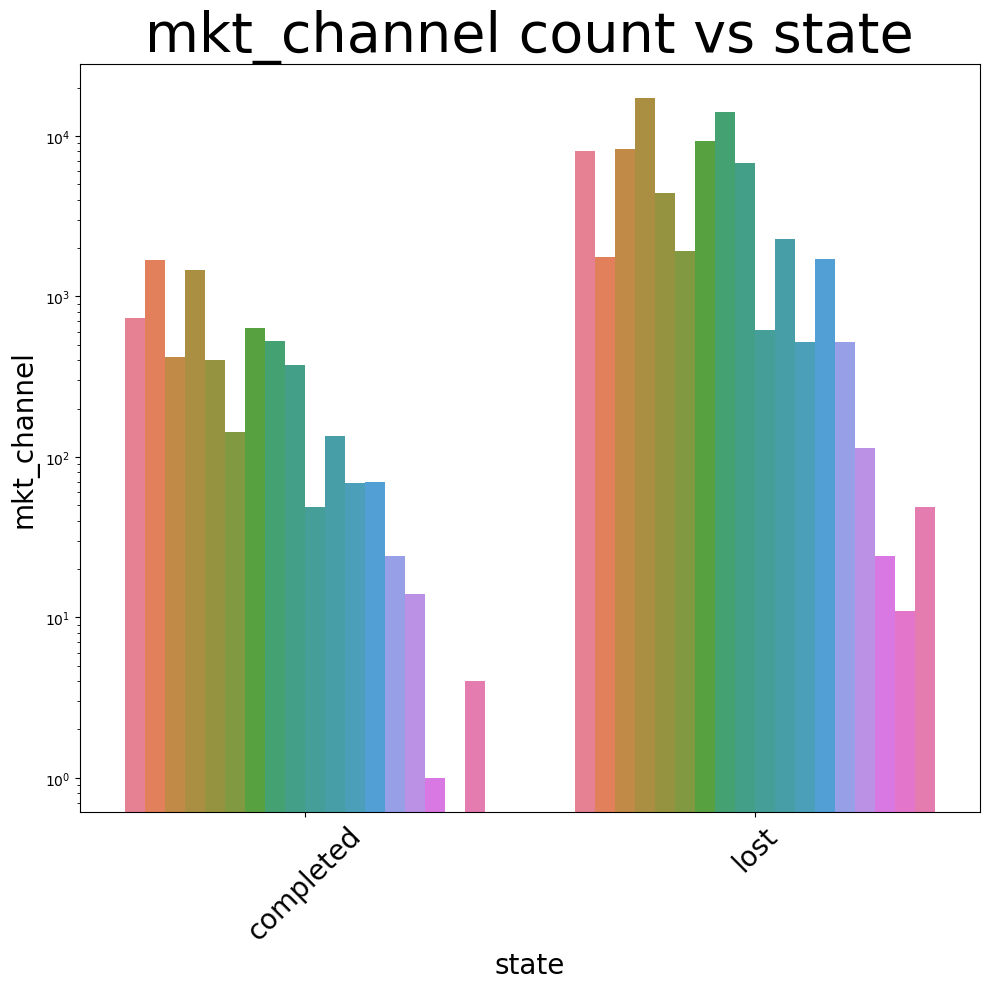

In [9]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.mkt_channel, legend=False)

plt.title('mkt_channel count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('mkt_channel',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot2.png')

plt.show()

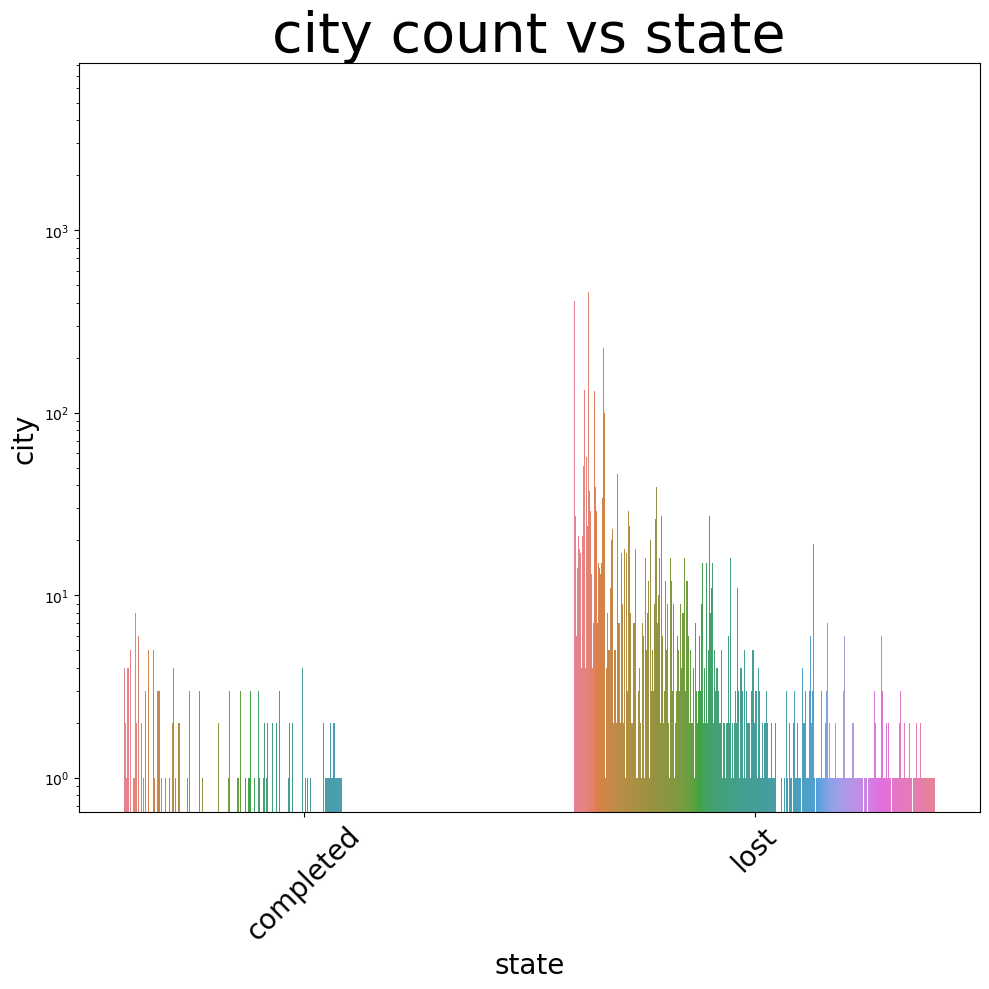

In [10]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.city, legend=False)

plt.title('city count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('city',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot3.png')

plt.show()

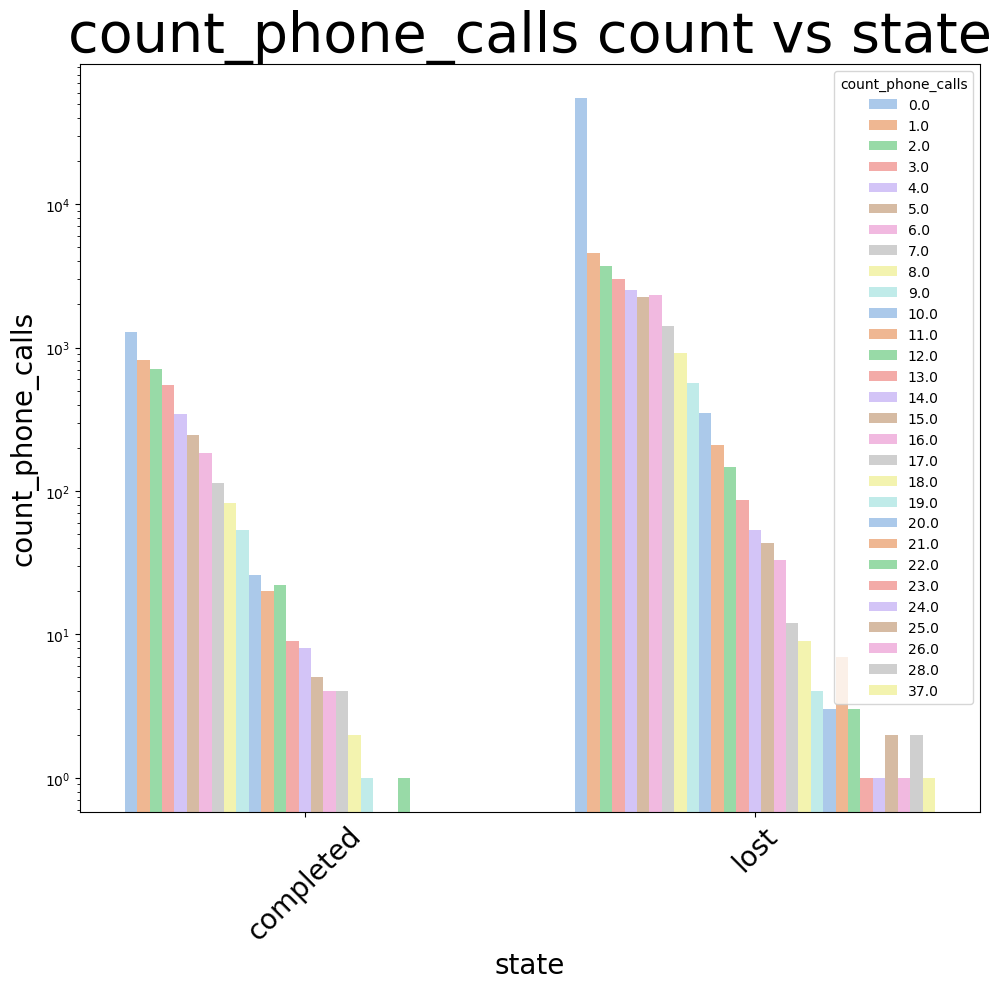

In [11]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.count_phone_calls, legend=True, palette='pastel')

plt.title('count_phone_calls count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('count_phone_calls',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot4.png')

plt.show()

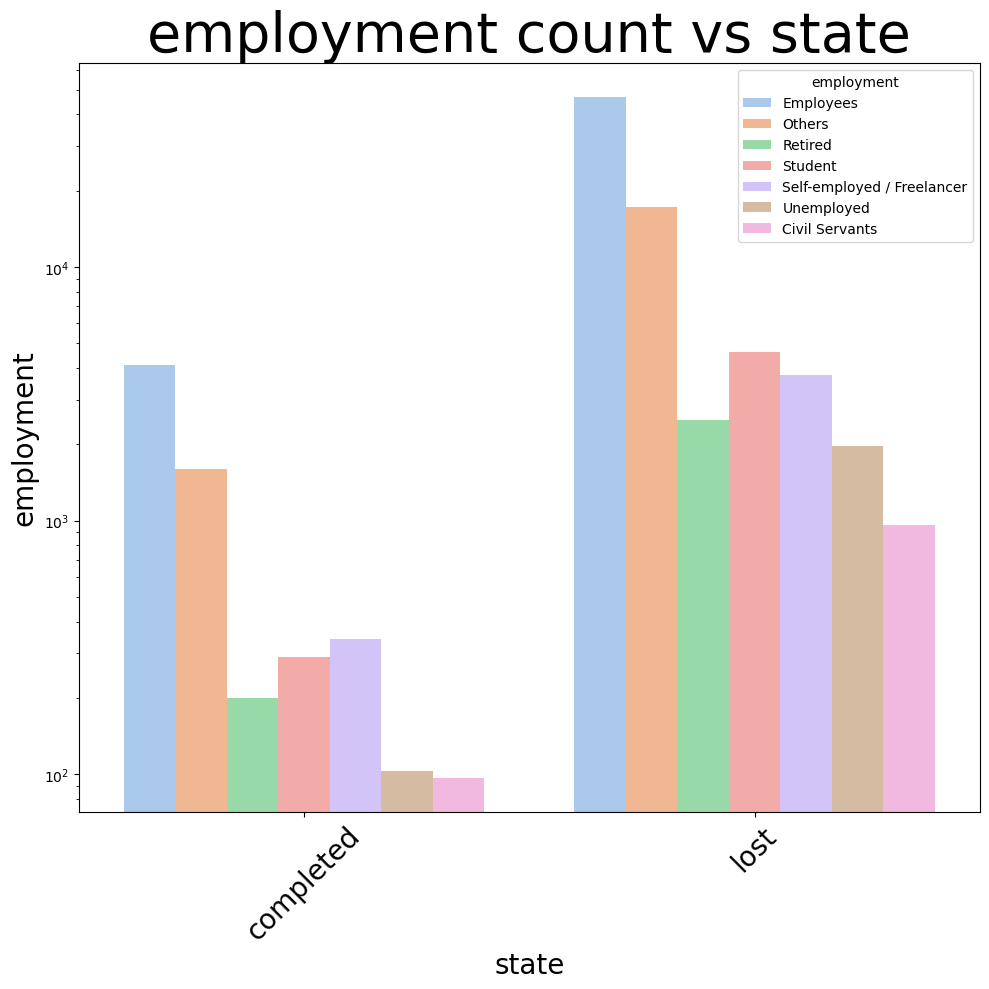

In [12]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.employment, legend=True, palette='pastel')

plt.title('employment count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('employment',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot5.png')

plt.show()

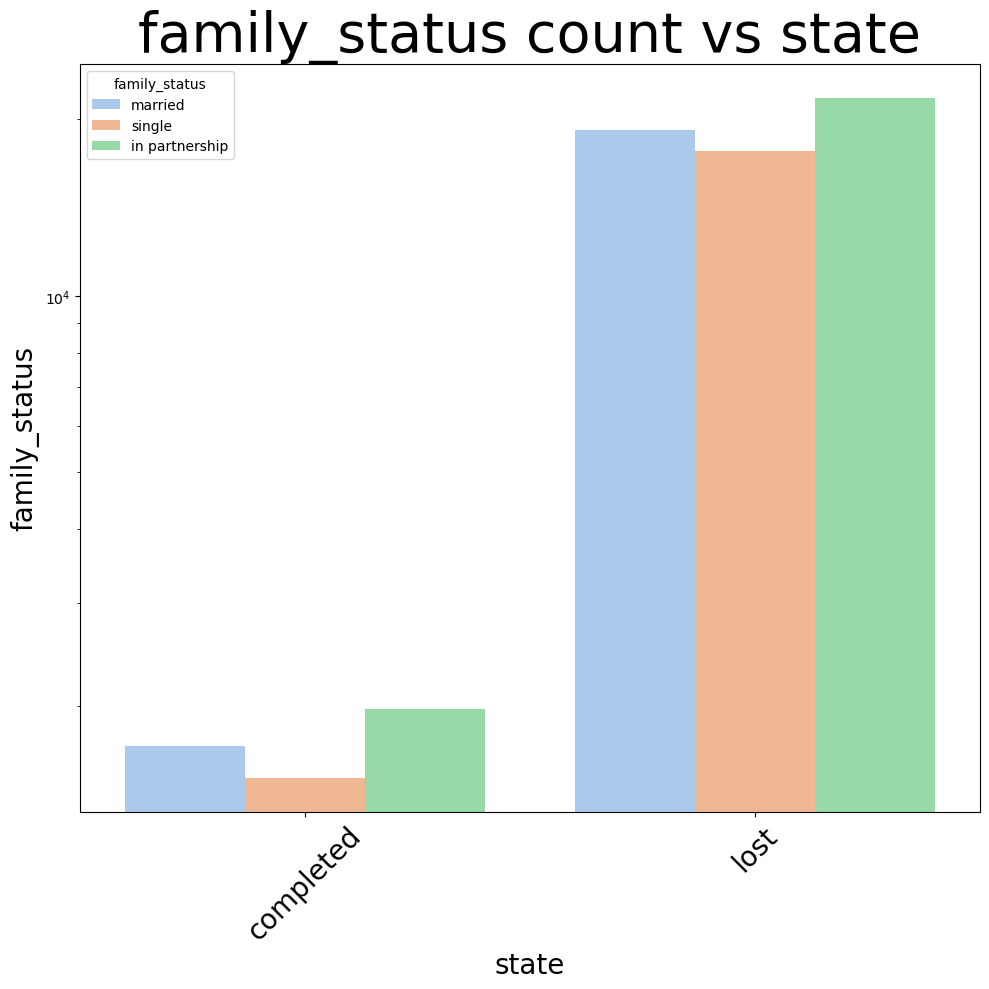

In [13]:
plt.figure(figsize=(10, 10))

sns.countplot(plot_df, x=plot_df.state, hue=plot_df.family_status, legend=True, palette='pastel')

plt.title('family_status count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('family_status',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot6.png')

plt.show()

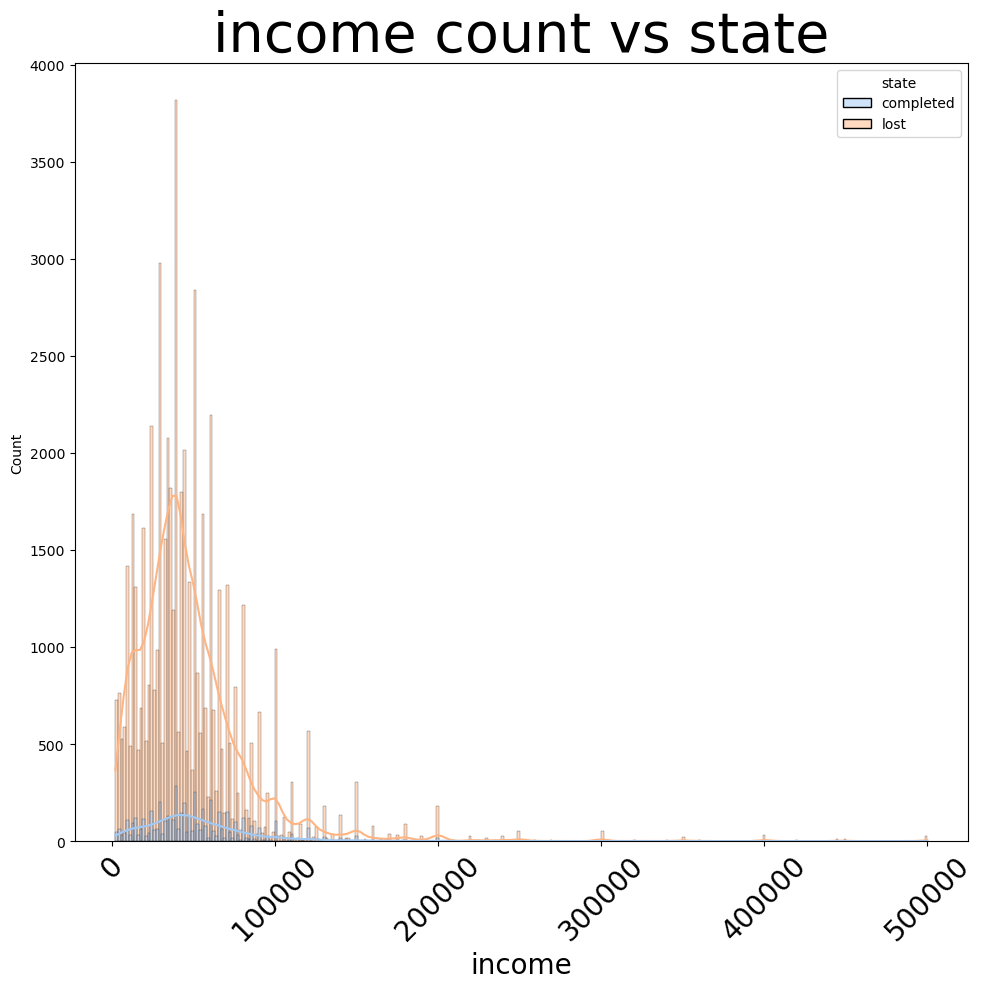

In [15]:
plt.figure(figsize=(10, 10))

sns.histplot(plot_df, x=plot_df.income, hue=plot_df.state, legend=True, kde=True,palette='pastel')

plt.title('income count vs state', fontsize=40) 
plt.xlabel('income', fontsize=20)
# plt.ylabel('income',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
# plt.yscale('log')
# plt.legend(loc='upper right', fontsize=14)  # You can adjust the fontsize as needed

plt.tight_layout() 

plt.savefig('plots/plot7.png')

plt.show()

# Impute Missing

In [118]:
def preliminary_cleaning(df):
    '''
    This function performs the following tasks:
    - adjust column datatypes
    - ensure data quality
    - create custom column 'dormancy_days'
    - add higher order terms (income) for linearity assumption
    - drop unnecessary columns
    '''

    # change dtypes & drop bugs
    df.consultant_id = df.consultant_id.astype('Int64')
    df.count_phone_calls = df.count_phone_calls.astype('Int64')
    df = df.loc[~(df['gender'] == 'company')]  # bug

    # custom columns
    df['registered_at'] = pd.to_datetime(df['registered_at'])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['dormancy_days'] = (df['created_at'] - df['registered_at']).dt.days.astype('int')

    # higher order coef_ for potential skewness in future
    df['income_log'] = np.log(df['income'])
    # df['income_log'] = df['income']**2

    # drop
    df.drop(columns=['created_at', 'assign_at', 'complete_at', 'lost_at', 'registered_at'], inplace=True)

    return df


def impute_missing_values(df):
    '''
    This function performs the following tasks:
    - replace all missing values in categorical columns with 'Unknown'
    - replace all missing values in numerical columns with 0
    - perform custom category-based & grouped-based imputation for specific columns
    - engineer new features based on existing columns
    '''
    for column in df.columns:

        # categorical
        if df[column].dtype == 'object':
            if column in ['family_status', 'kids']:
                df[column].fillna('Unknown', inplace=True)

            elif column == 'city':
                top_5 = df['city'].value_counts().head(5).index
                df.loc[~df['city'].isin(top_5), 'city'] = 'Others'
                df['city'].fillna('Others', inplace=True)

            elif column == 'category_name':
                top_7 = df['category_name'].value_counts().head(7).index
                df.loc[~df['category_name'].isin(top_7), 'category_name'] = 'Others'
                df['category_name'].fillna('Others', inplace=True)

            elif column == 'mkt_channel':
                top_8 = df['mkt_channel'].value_counts().head(8).index
                df.loc[~df['mkt_channel'].isin(top_8), 'mkt_channel'] = 'Others'
                df['mkt_channel'].fillna('Others', inplace=True)

            elif column in ['gender']:
                df['gender'] = df.groupby(['employment', 'life_aspect'])['gender'].transform(
                    lambda x: x.fillna(x.mode()[0]))

            else:
                df[column].fillna('0', inplace=True)


        # numerical
        elif df[column].dtype != 'object':

            if column == 'count_phone_calls':
                df['count_phone_calls'] = df.groupby(['life_aspect', 'mkt_channel'])['count_phone_calls'].transform(
                    lambda x: x.fillna(x.mode()[0])).astype('int')

            elif column in ['income']:
                df['income'] = df.groupby(['employment'])['income'].transform(lambda x: x.fillna(x.median())).astype(
                    'float')

            elif column in ['age']:

                df['age'] = df.groupby(['employment','life_aspect'])['age'].transform(lambda x: x.fillna(x.mode()[0]))   
                bins = [0, 30, 45, 55, float('inf')]
                labels = ['0-30', '31-45', '46-55', '56+']
                df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False).astype('str')

                
            elif column == 'consultant_id':
                df['consultant_id'] = df['consultant_id'].fillna(0)
                consultant_deal_counts = df['consultant_id'].value_counts()
                df['deals_per_consultant'] = df['consultant_id'].map(consultant_deal_counts).astype('int')
                df.drop(columns=['consultant_id'], inplace=True)

            elif column == 'customer_id':
                deals_per_customer = df['customer_id'].value_counts()
                df['deals_per_customer'] = df['customer_id'].map(deals_per_customer)
                df.drop(columns=['customer_id'], inplace=True)
            else:
                df[column].fillna(df[column].median(), inplace=True)

    return df



In [119]:
df = preliminary_cleaning(df)



# Impute Missing Values
df = impute_missing_values(df)

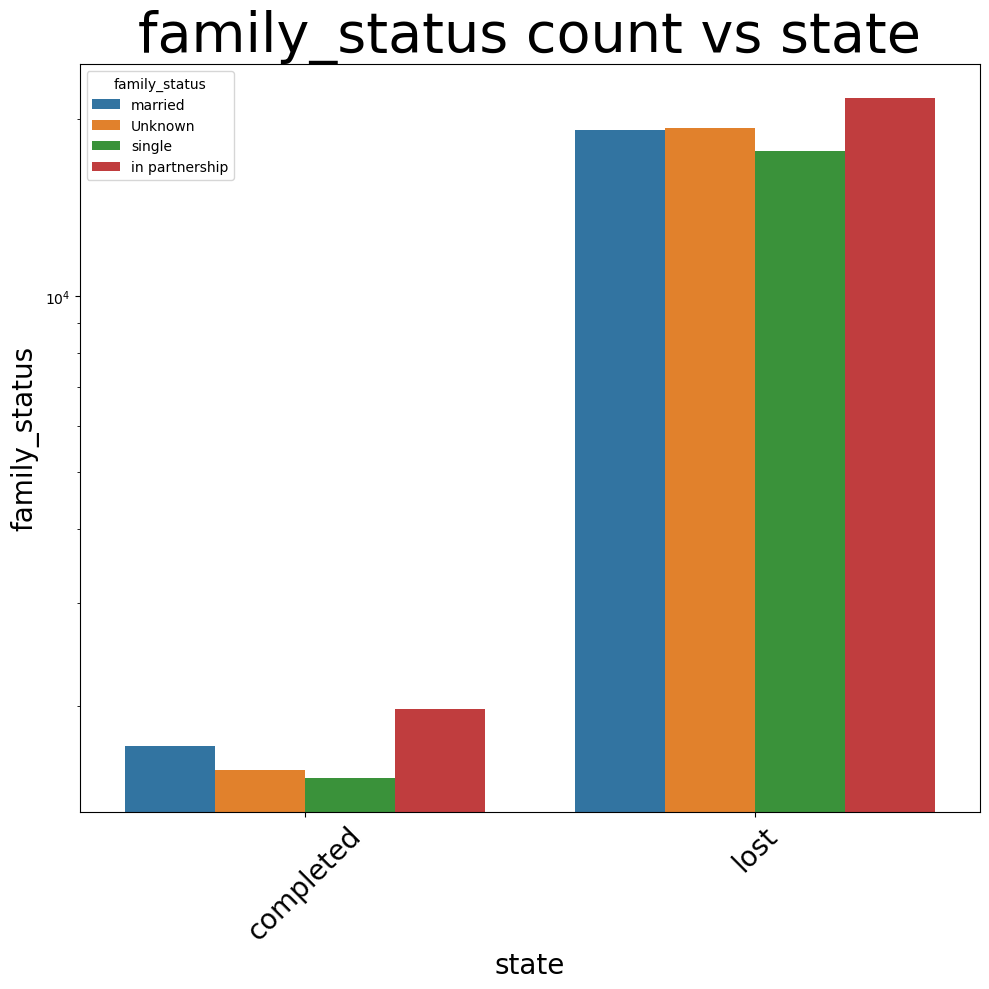

In [124]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.family_status, legend=True)

plt.title('family_status count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('family_status',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
plt.tight_layout() 

plt.savefig('plots/plot_impu1.png')

plt.show()

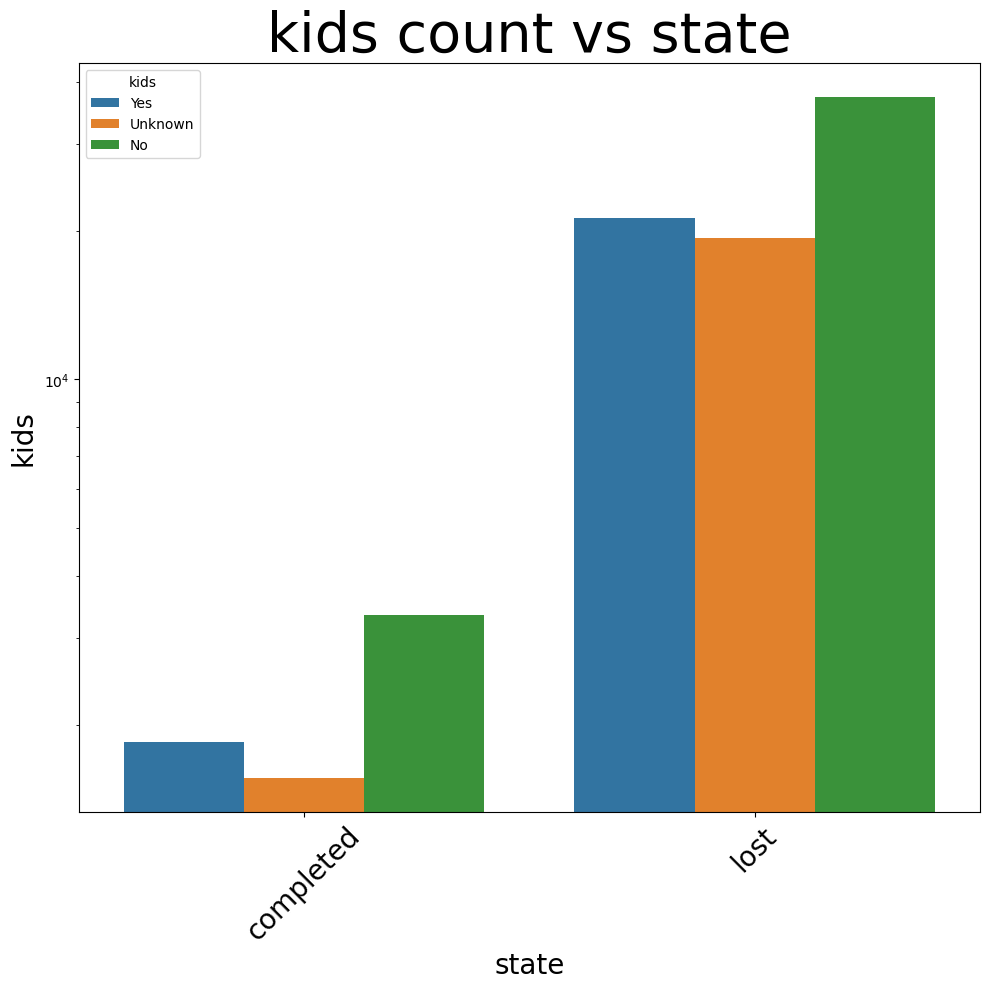

In [125]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.kids, legend=True)

plt.title('kids count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('kids',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
plt.tight_layout() 

plt.savefig('plots/plot_impu2.png')

plt.show()

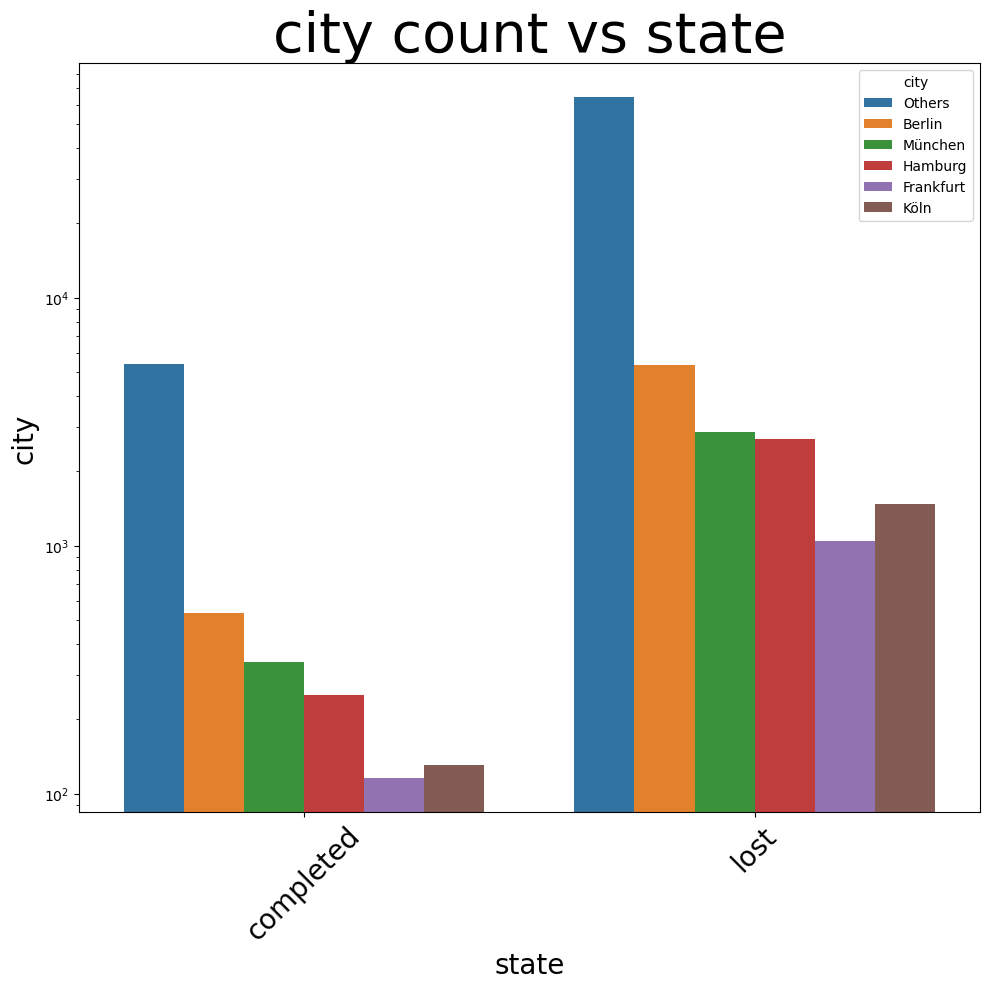

In [126]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.city, legend=True)

plt.title('city count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('city',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=14) 

plt.tight_layout() 

plt.savefig('plots/plot_impu3.png')

plt.show()

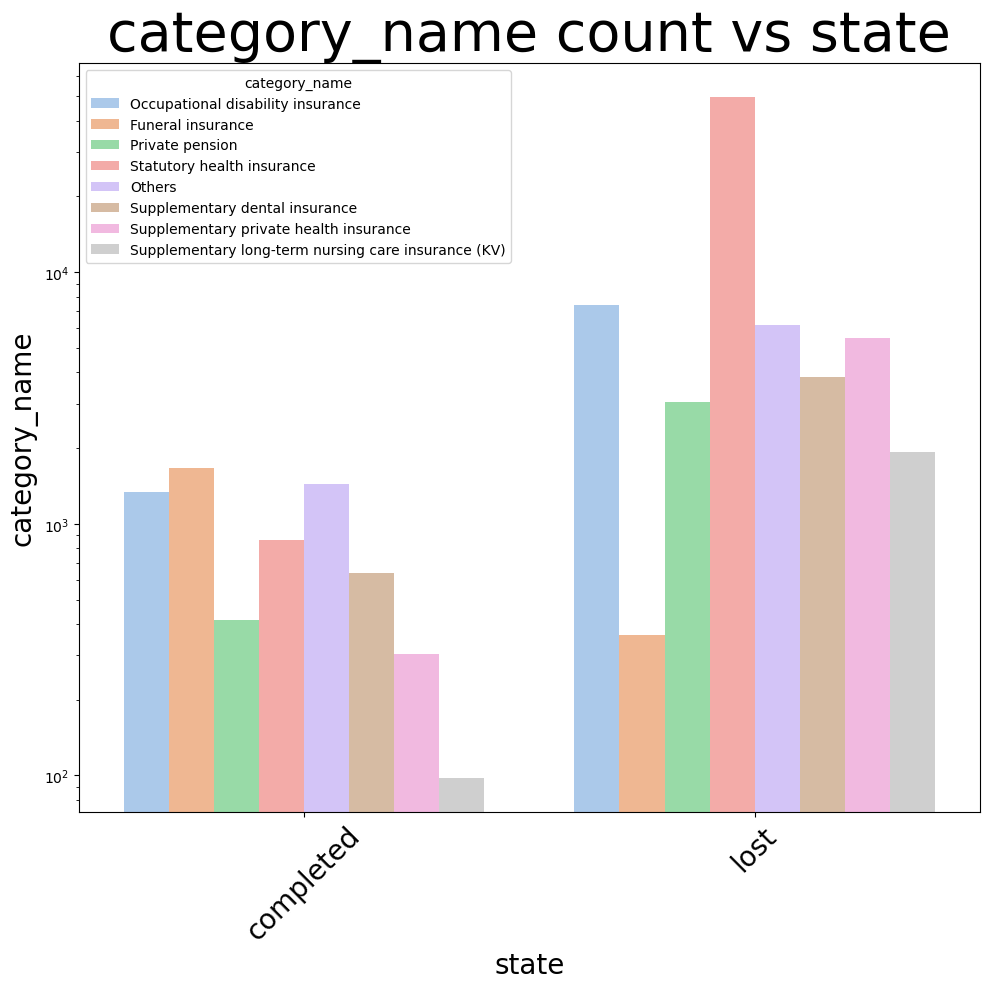

In [127]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.category_name, legend=True, palette='pastel')

plt.title('category_name count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('category_name',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=14) 

plt.tight_layout() 

plt.savefig('plots/plot_impu4.png')

plt.show()

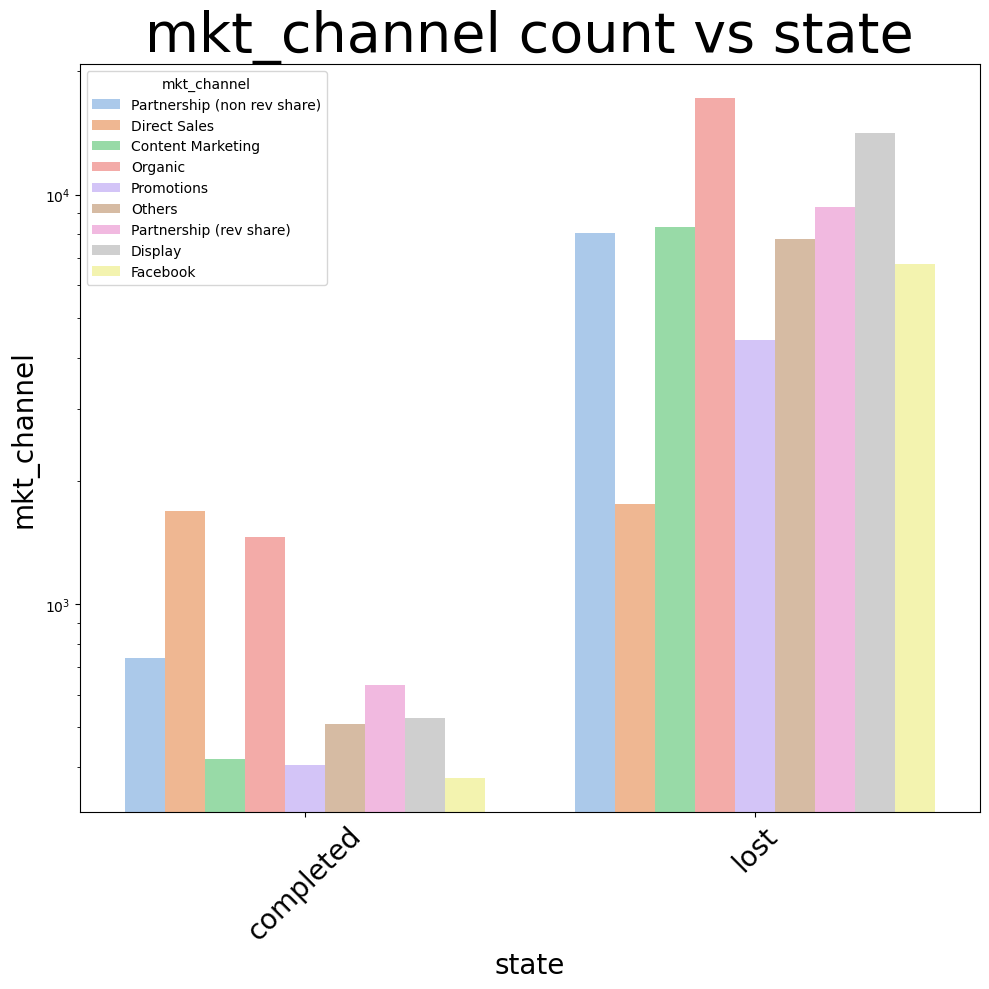

In [128]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.mkt_channel, legend=True, palette='pastel')

plt.title('mkt_channel count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('mkt_channel',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')

plt.tight_layout() 

plt.savefig('plots/plot_impu5.png')

plt.show()

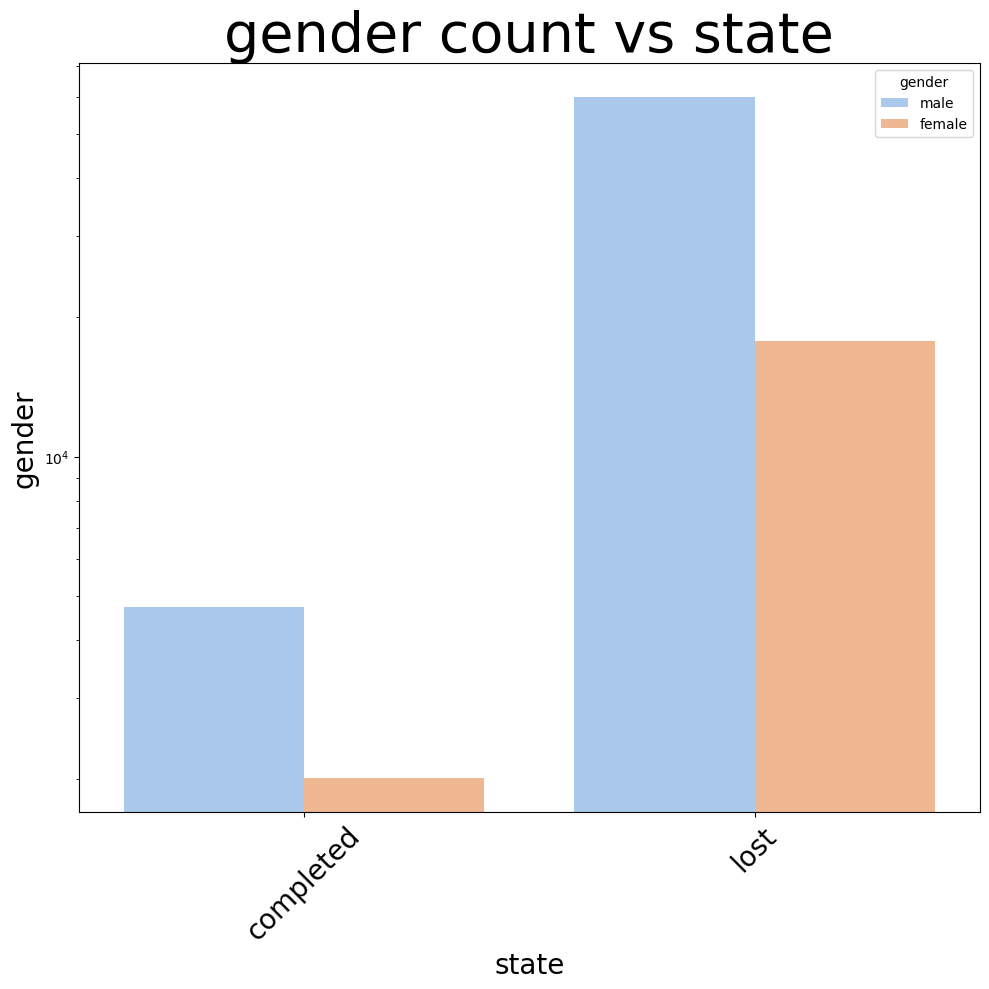

In [129]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.gender, legend=True, palette='pastel')

plt.title('gender count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('gender',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')

plt.tight_layout() 

plt.savefig('plots/plot_impu6.png')

plt.show()

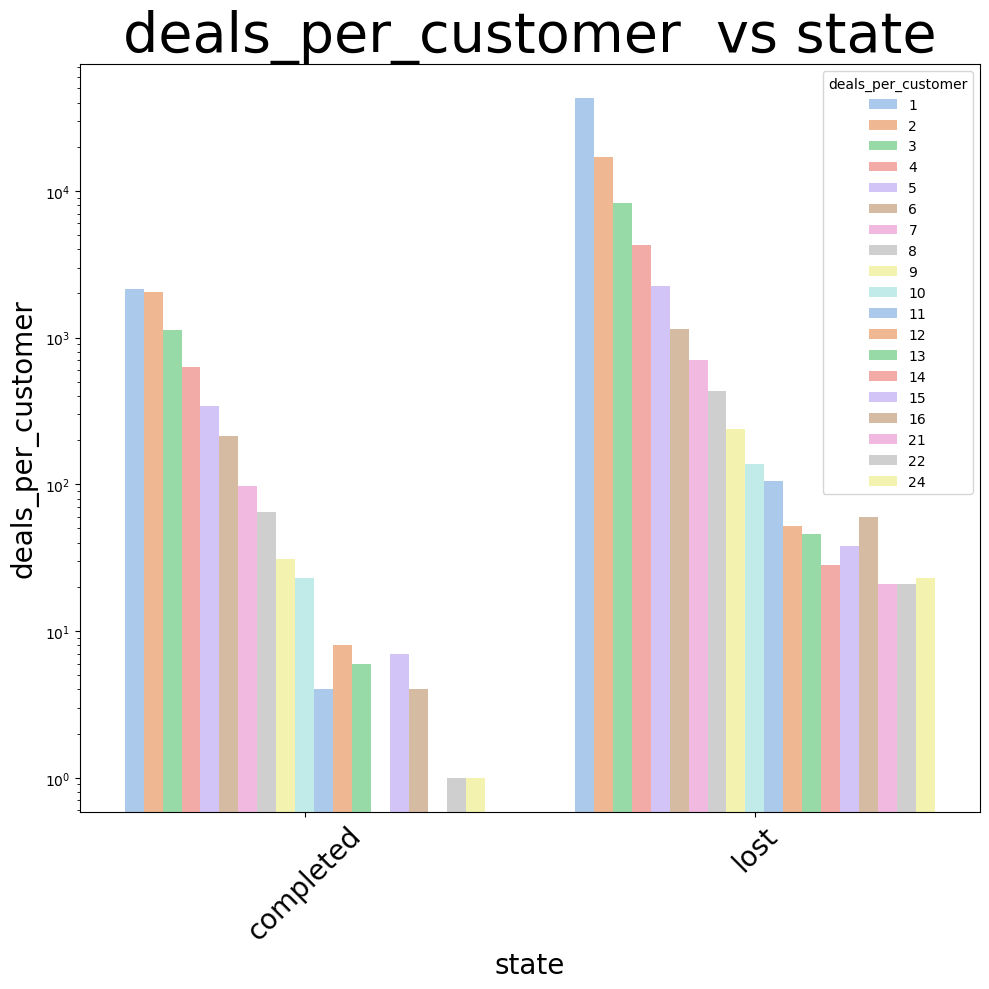

In [130]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.deals_per_customer, legend=True, palette='pastel')

plt.title('deals_per_customer  vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('deals_per_customer',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')

plt.tight_layout() 

plt.savefig('plots/plot_impu7.png')

plt.show()

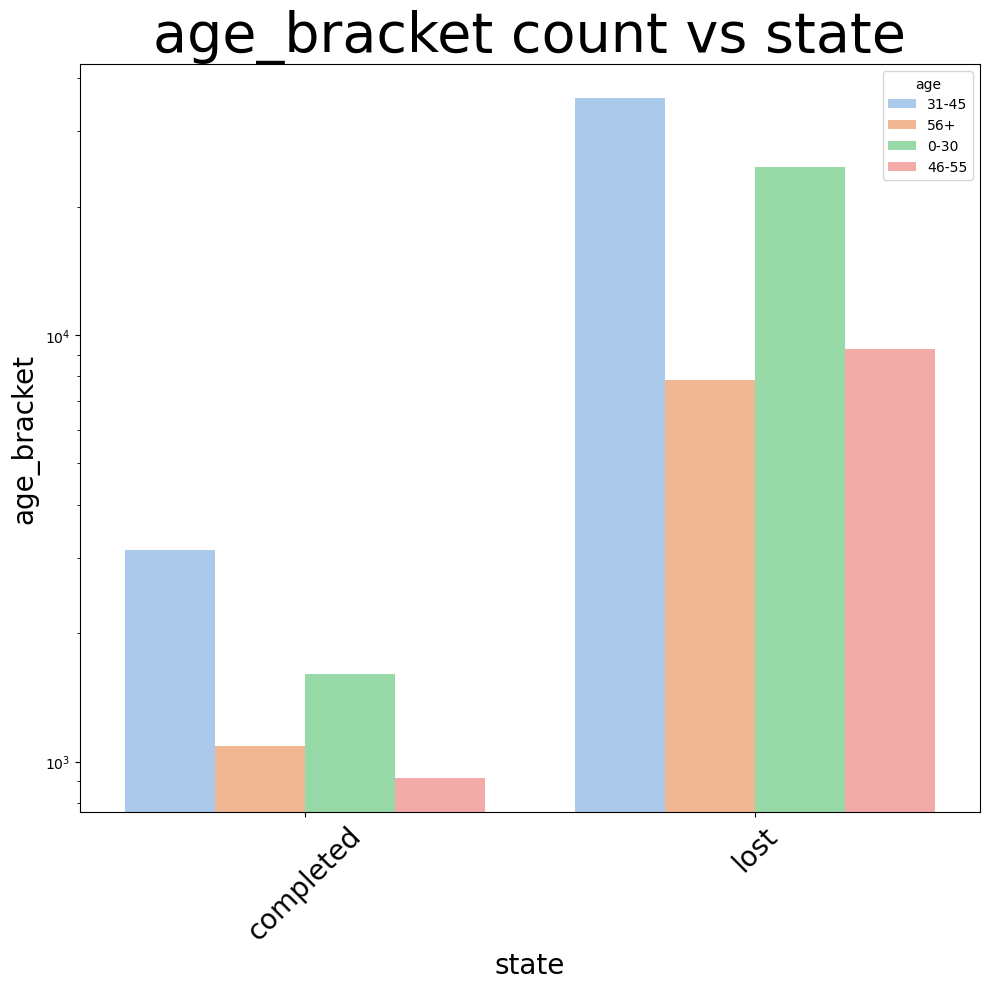

In [133]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.age, legend=True, palette='pastel')

plt.title('age_bracket count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('age_bracket',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')

plt.tight_layout() 

plt.savefig('plots/plot_impu8.png')

plt.show()

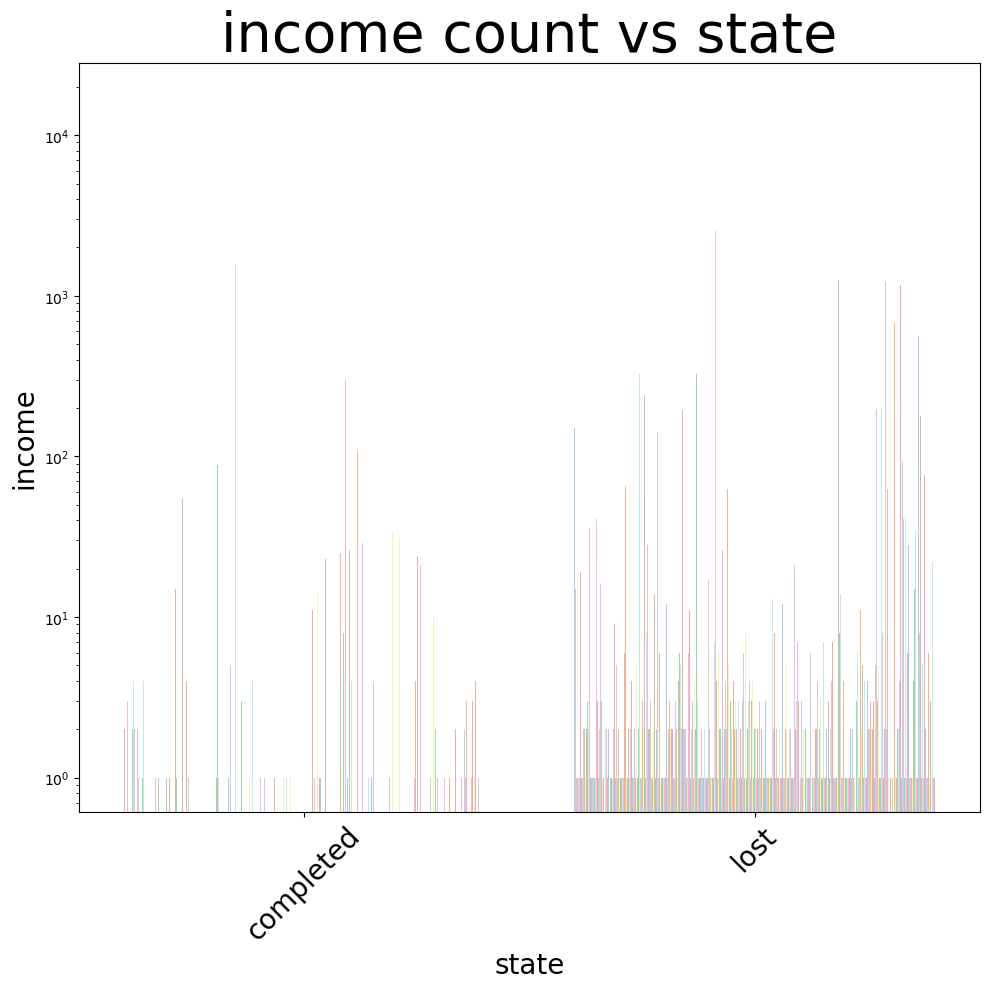

In [134]:
plt.figure(figsize=(10, 10))

sns.countplot(df, x=df.state, hue=df.income, legend=False, palette='pastel')

plt.title('income count vs state', fontsize=40) 
plt.xlabel('state', fontsize=20)
plt.ylabel('income',fontsize=20) 

plt.xticks(rotation=45, fontsize=20)
plt.yscale('log')

plt.tight_layout() 

plt.savefig('plots/plot_impu9.png')

plt.show()

## Correlation

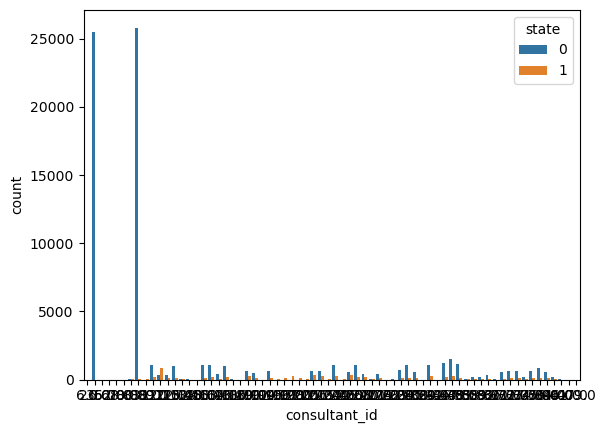

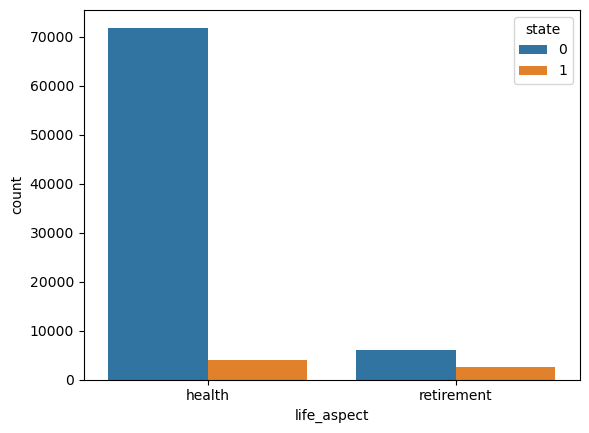

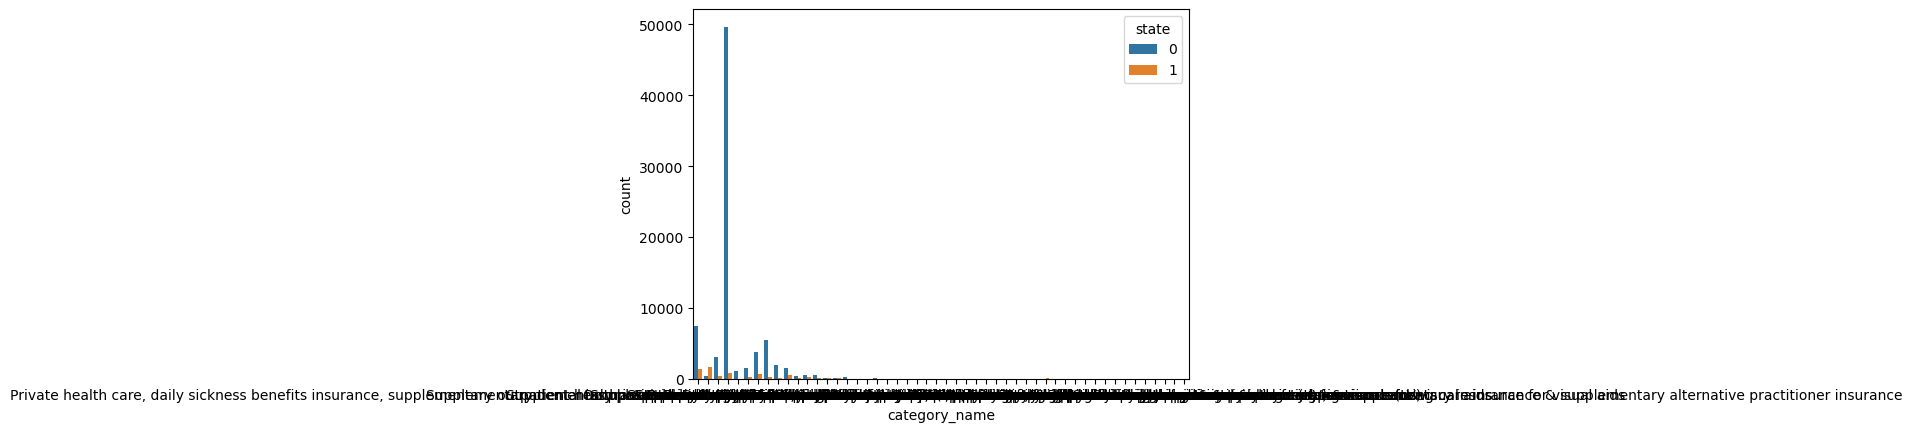

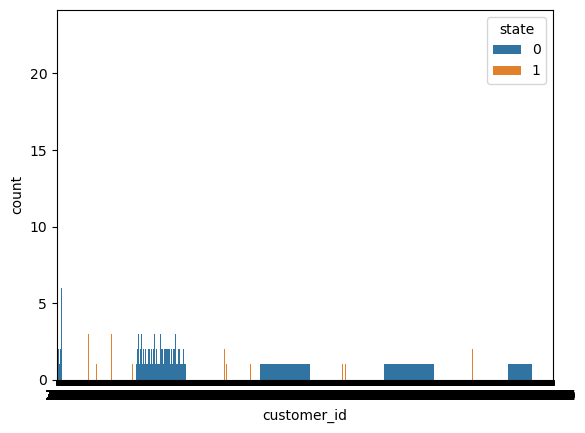

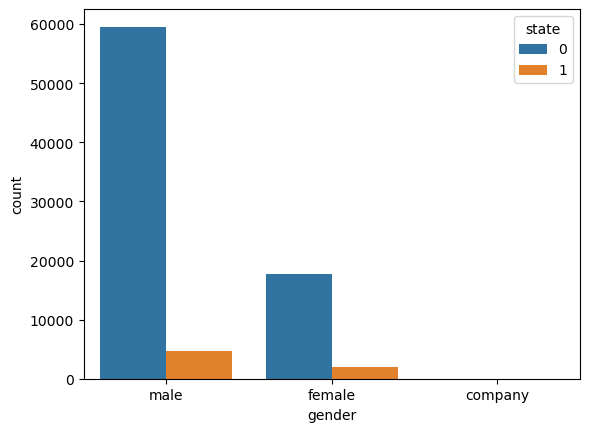

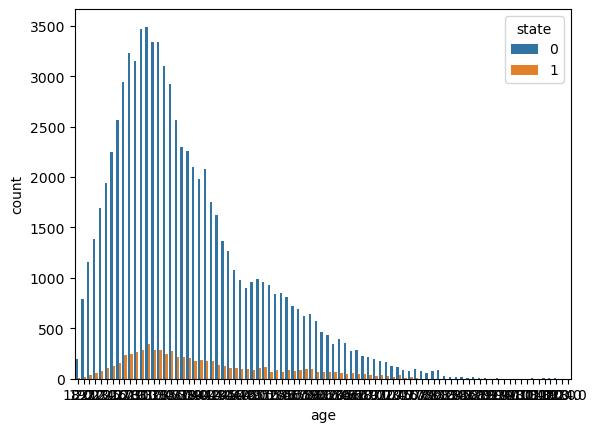

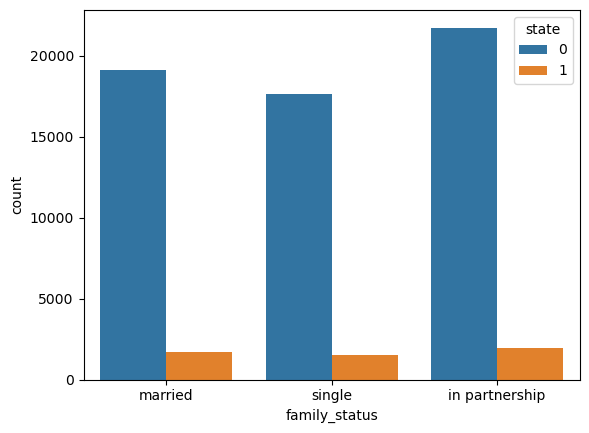

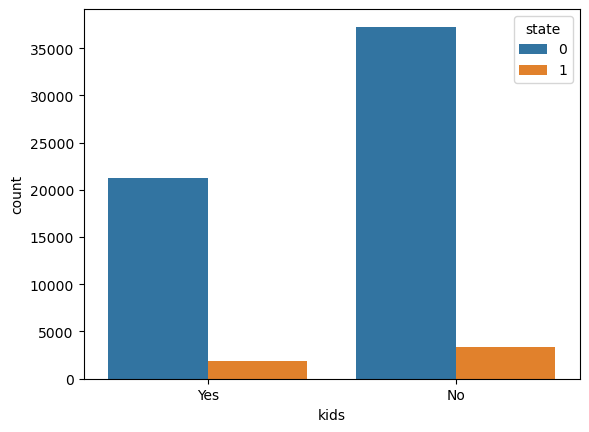

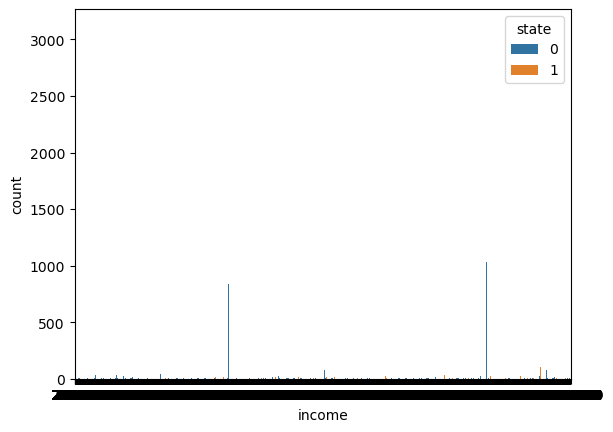

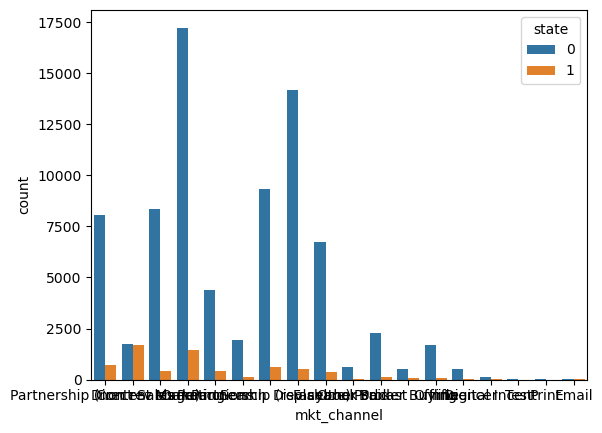

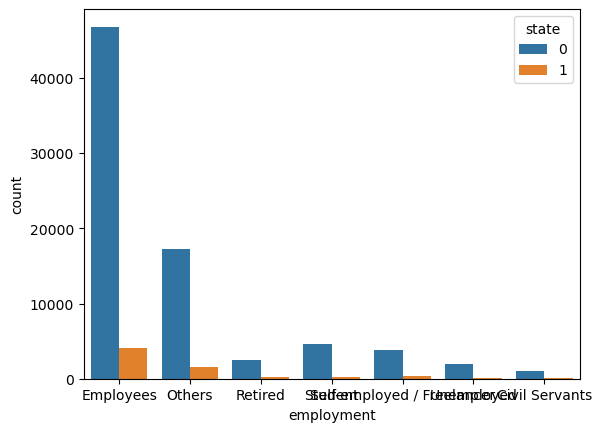

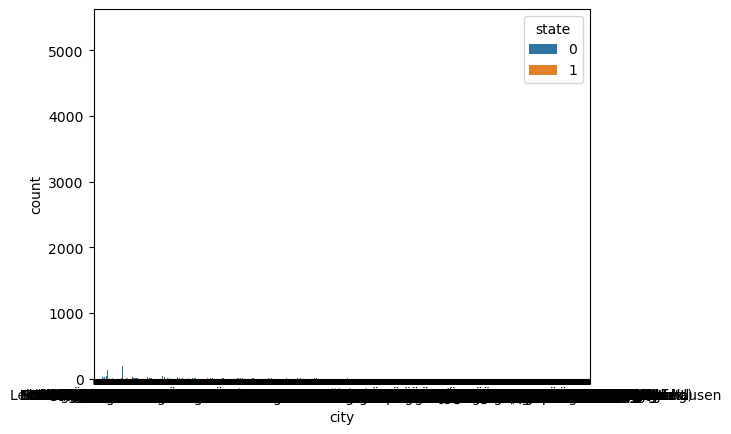

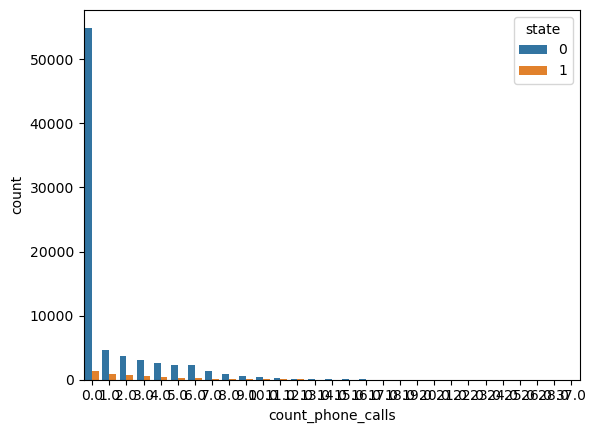

In [61]:
for col in plot_df.columns:
    if col != 'state':
        sns.countplot(data=plot_df, x=col, hue='state')
        plt.show()

In [102]:
# plot_df.groupby(['state', 'consultant_id']).size().reset_index(name='opportunities_count').sort_values(by='opportunities_count', ascending=False)


state
0    51296
1       12
Name: count, dtype: int64


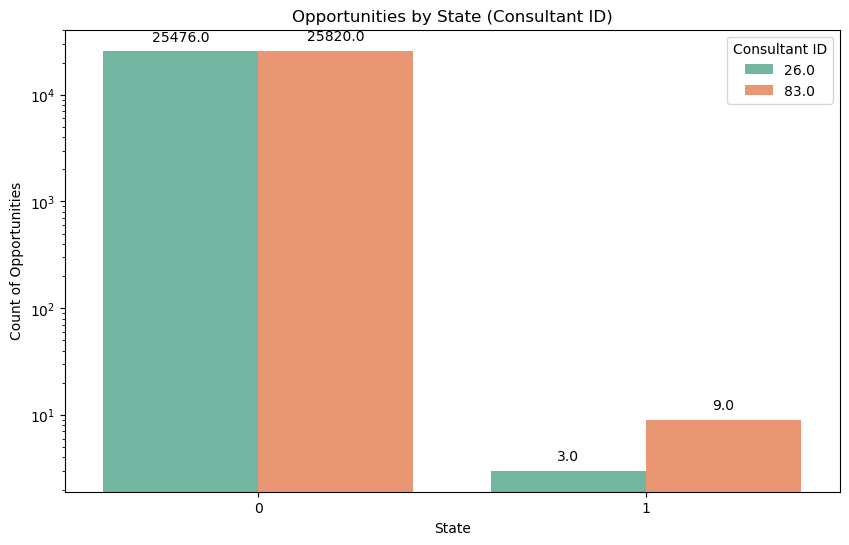

In [112]:
print(df.loc[df.consultant_id.isin([83.0, 26.0])].state.value_counts())

filtered_df = df.loc[df.consultant_id.isin([83.0, 26.0])]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, x='state', hue='consultant_id', palette='Set2')
plt.title('Opportunities by State (Consultant ID)')
plt.xlabel('State')
plt.yscale('log')
plt.ylabel('Count of Opportunities')
plt.legend(title='Consultant ID')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.savefig('plots/consultantID.png')
plt.show()


In [149]:
df = df[~df['consultant_id'].isin([83.0, 26.0])]

In [150]:
df.state.value_counts()

state
0    22532
1     2965
Name: count, dtype: int64

In [155]:
df[df['consultant_id'].isin([83.0, 26.0])].category_name.value_counts()

category_name
Statutory health insurance        43816
Supplementary dental insurance        6
Private pension                       1
Name: count, dtype: int64

In [8]:
import pandas as pd
import numpy as np
from itertools import combinations  
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Define specific columns for which you want to calculate Cramér's V
specific_columns = ['state', 'life_aspect', 'category_name', 'customer_id','gender', 'age', 'family_status', 'kids', 'income', 'mkt_channel', 'employment', 'city', 'count_phone_calls' ]

# Calculate Cramér's V for each pair of specified columns
cramers_v_values = {}
for pair in combinations(specific_columns, 2):
    cramers_v_values[pair] = cramers_v(df[pair[0]], df[pair[1]])

# Print Cramér's V values for the specified pairs
for pair, value in cramers_v_values.items():
    print(f"Cramér's V between '{pair[0]}' and '{pair[1]}': {value}")




Cramér's V between 'state' and 'life_aspect': 0.28373150581689244
Cramér's V between 'state' and 'category_name': 0.2638350283566183
Cramér's V between 'state' and 'customer_id': 0.0
Cramér's V between 'state' and 'gender': 0.030818163246902015
Cramér's V between 'state' and 'age': 0.044259212206847524
Cramér's V between 'state' and 'family_status': 0.008025600858021106
Cramér's V between 'state' and 'kids': 0.0
Cramér's V between 'state' and 'income': 0.0
Cramér's V between 'state' and 'mkt_channel': 0.16006363401347834
Cramér's V between 'state' and 'employment': 0.018664332862393117
Cramér's V between 'state' and 'city': 0.0
Cramér's V between 'state' and 'count_phone_calls': 0.12214661790911828
Cramér's V between 'life_aspect' and 'category_name': 0.9997174209899782
Cramér's V between 'life_aspect' and 'customer_id': 0.0
Cramér's V between 'life_aspect' and 'gender': 0.03769124685437477
Cramér's V between 'life_aspect' and 'age': 0.09094139388378862
Cramér's V between 'life_aspect'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84956 entries, 0 to 84955
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 84956 non-null  int64  
 1   state              84956 non-null  object 
 2   created_at         84956 non-null  object 
 3   assign_at          69389 non-null  object 
 4   complete_at        6747 non-null   object 
 5   lost_at            77835 non-null  object 
 6   consultant_id      83406 non-null  float64
 7   life_aspect        84956 non-null  object 
 8   category_name      84946 non-null  object 
 9   customer_id        84956 non-null  int64  
 10  registered_at      84956 non-null  object 
 11  gender             84389 non-null  object 
 12  age                84382 non-null  float64
 13  family_status      64069 non-null  object 
 14  kids               64023 non-null  object 
 15  income             63429 non-null  float64
 16  mkt_channel        849

In [9]:
df.describe()

,id,consultant_id,customer_id,age,income,count_phone_calls
count,84956.000000,83406.000000,84956.000000,84382.000000,63429.000000,82061.000000
mean,267690.736546,131.378438,24647.711886,36.898628,48111.094153,1.242344
std,46158.571222,114.602608,17961.809638,12.222629,36904.783755,2.427650
min,187425.000000,6.000000,1.000000,18.000000,2000.000000,0.000000
25%,227487.750000,26.000000,8839.000000,28.000000,27000.000000,0.000000
50%,268934.500000,83.000000,20487.000000,34.000000,40300.000000,0.000000
75%,307620.500000,205.000000,39959.250000,43.000000,60000.000000,1.000000
max,346140.000000,409.000000,60154.000000,124.000000,500000.000000,37.000000


In [10]:
df.apply(lambda col: col.nunique())

id                   84956
state                    5
created_at           77068
assign_at            61494
complete_at           6746
lost_at              52520
consultant_id           68
life_aspect              2
category_name           50
customer_id          60152
registered_at        60027
gender                   3
age                     85
family_status            3
kids                     2
income                2549
mkt_channel             18
employment               7
city                  8472
count_phone_calls       29
dtype: int64

In [11]:
df.isna().sum()

id                       0
state                    0
created_at               0
assign_at            15567
complete_at          78209
lost_at               7121
consultant_id         1550
life_aspect              0
category_name           10
customer_id              0
registered_at            0
gender                 567
age                    574
family_status        20887
kids                 20933
income               21527
mkt_channel              0
employment               0
city                   598
count_phone_calls     2895
dtype: int64

In [12]:
df.life_aspect.value_counts()

life_aspect
health        76292
retirement     8664
Name: count, dtype: int64

In [13]:
df.state.value_counts()

state
lost                77835
completed            6747
created               195
offer_phase           148
initiation_phase       31
Name: count, dtype: int64

In [14]:
df_completed =  df.loc[df.state == 'completed']
df_completed.isna().sum()

id                      0
state                   0
created_at              0
assign_at            3781
complete_at             0
lost_at              6747
consultant_id           0
life_aspect             0
category_name           7
customer_id             0
registered_at           0
gender                  1
age                     5
family_status        1555
kids                 1564
income               1748
mkt_channel             0
employment              0
city                   11
count_phone_calls    2285
dtype: int64

# Column wise Analysis

## id = each row is one unique instance so I'll drop this

In [15]:
df.id.isna().sum()

0

## state 

In [16]:
df.state.isna().sum()

0

In [17]:
df.state.value_counts()

state
lost                77835
completed            6747
created               195
offer_phase           148
initiation_phase       31
Name: count, dtype: int64

<Axes: xlabel='state', ylabel='count'>

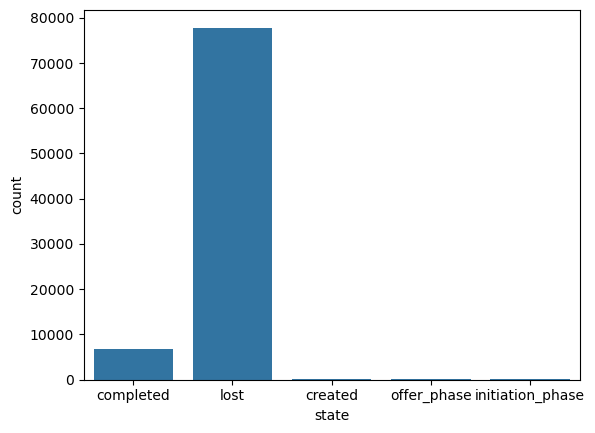

In [18]:
sns.countplot(data=df, x=df.state)

## assign_at, 'created_at', 'assign_at', 'complete_at', 'lost_at','registered_at'

<Axes: xlabel='state', ylabel='count'>

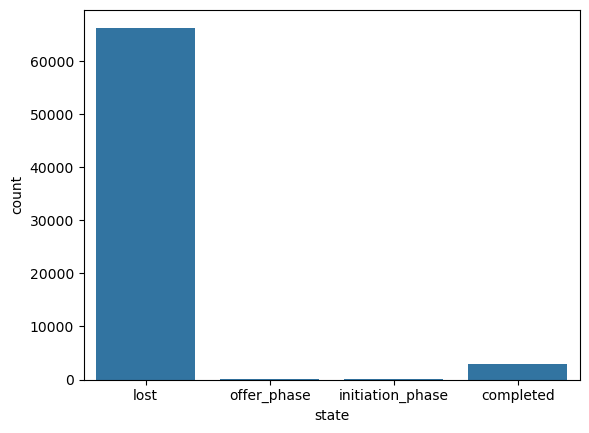

In [19]:
test = df.loc[df['assign_at'].notna()]
sns.countplot(data=test, x=test.state)

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['registered_at'] = pd.to_datetime(df['registered_at'])

df['dormancy_days'] = (df['created_at'] - df['registered_at']).dt.days

sns.barplot(data=df, y=df.dormancy_days, x=df.state, palette='pastel')
plt.xticks(rotation=90, fontsize=10) 
plt.show()

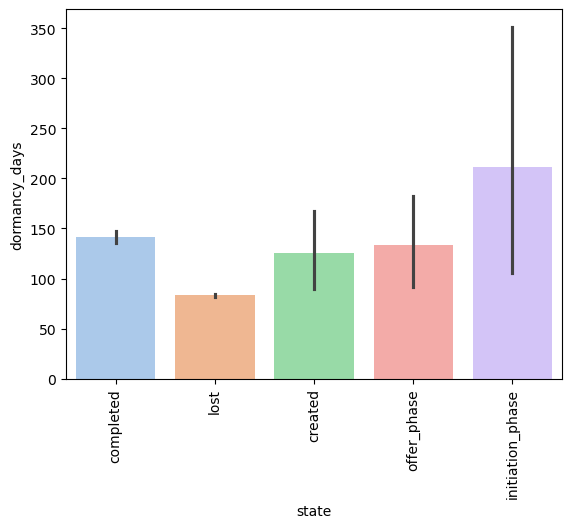

In [21]:
sns.barplot(data=df, y=df.dormancy_days, x=df.state, palette='pastel')
plt.xticks(rotation=90, fontsize=10) 
plt.show()

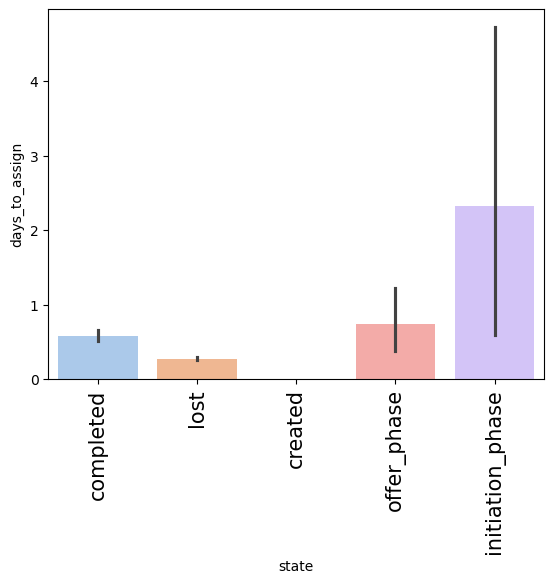

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['assign_at'] = pd.to_datetime(df['assign_at'])

df['days_to_assign'] = (df['assign_at'] - df['created_at']).dt.days

sns.barplot(data=df, y=df.days_to_assign, x=df.state, palette='pastel')
plt.xticks(rotation=90, fontsize=15) 
plt.xticks(fontsize=15) 
plt.show()

In [11]:
# df.loc[df.state == 'completed']['days_to_assign'].value_counts()
# df.loc[df.state == 'lost']['days_to_assign'].value_counts()
# df.loc[df.state == 'initiation_phase']['days_to_assign'].value_counts()

days_to_assign
0.0     13
2.0      4
5.0      1
19.0     1
1.0      1
3.0      1
15.0     1
Name: count, dtype: int64

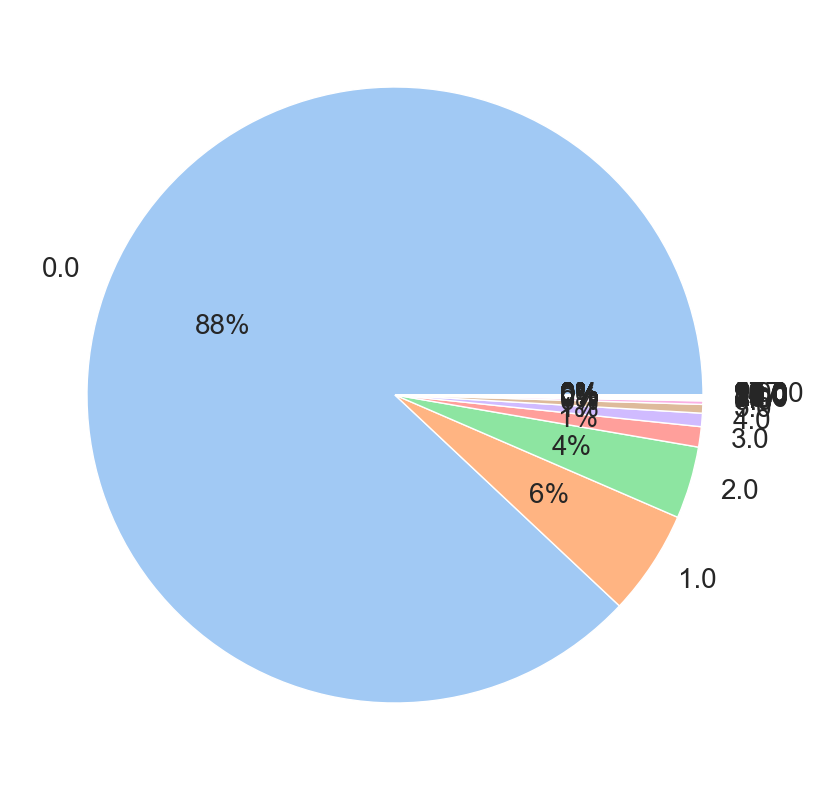

In [29]:
plt.figure(figsize=(10,10))
plt.pie(x=df.days_to_assign.value_counts(), labels=df.days_to_assign.value_counts().index, colors=sns.color_palette('pastel'), autopct='%.0f%%', textprops={'fontsize': 20})
# plt.legend()
plt.show()

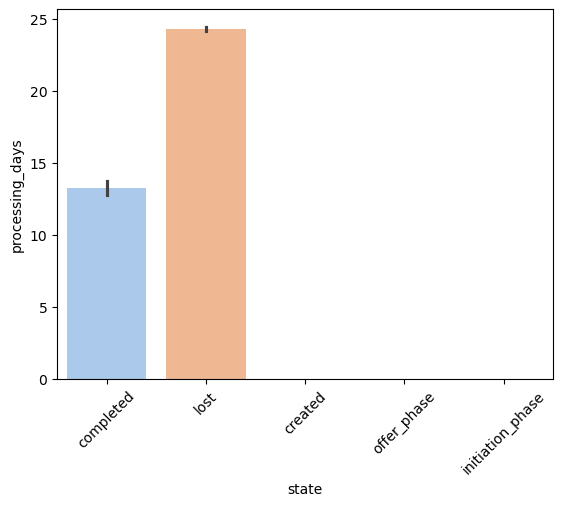

In [25]:
# %%timeit
df['created_at'] = pd.to_datetime(df['created_at'])
df['complete_at'] = pd.to_datetime(df['complete_at'])
df['lost_at'] = pd.to_datetime(df['lost_at'])
df['processing_days'] =  pd.NA

df.loc[df.state == 'completed', 'processing_days' ] = (df['complete_at'] - df['created_at']).dt.days
df.loc[df.state == 'lost', 'processing_days' ] = (df['lost_at'] - df['created_at']).dt.days
df.processing_days =  df.processing_days.astype('Int64')

sns.barplot(data=df, y=df.processing_days, x=df.state, palette='pastel')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

## consultant_id

In [62]:
df

,id,state,created_at,assign_at,complete_at,lost_at,consultant_id,life_aspect,category_name,customer_id,...,gender,age,family_status,kids,income,mkt_channel,employment,city,count_phone_calls,deals_per_consultant
0,251436,completed,2019-11-29 10:44:35,NaN,2019-11-29 15:22:19,NaN,176.0,health,Occupational disability insurance,4534,...,male,40.0,married,Yes,75000.0,Partnership (non rev share),Employees,Altrip,NaN,1234
1,206158,completed,2019-08-16 07:51:02,NaN,2019-08-16 07:51:13,NaN,270.0,retirement,Funeral insurance,18032,...,male,59.0,NaN,NaN,NaN,Direct Sales,Others,Moers,NaN,88
2,336225,lost,2020-06-10 11:43:18,NaN,NaN,2020-06-17 17:20:24,0.0,retirement,Private pension,1,...,male,65.0,married,Yes,24000.0,Content Marketing,Retired,Oberding,NaN,1550
3,285420,lost,2020-02-21 13:28:53,NaN,NaN,2020-02-25 09:44:16,0.0,retirement,Funeral insurance,2,...,NaN,NaN,NaN,NaN,NaN,Organic,Others,NaN,NaN,1550
4,201806,lost,2019-08-05 09:04:08,NaN,NaN,2019-08-06 16:34:48,176.0,health,Occupational disability insurance,3,...,male,31.0,single,No,110000.0,Promotions,Employees,Frankfurt am Main,NaN,1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84951,197391,completed,2019-07-25 10:32:41,NaN,2019-07-25 10:32:48,NaN,197.0,retirement,Funeral insurance,60151,...,female,40.0,single,Yes,125000.0,Direct Sales,Others,Alzey,NaN,244
84952,251747,completed,2019-11-30 10:34:05,NaN,2019-12-23 07:36:36,NaN,120.0,health,Statutory health insurance,4819,...,male,27.0,in partnership,No,NaN,Display,Employees,Stuttgart,0.0,1252
84953,270361,completed,2020-01-21 11:50:35,NaN,2020-01-23 10:09:13,NaN,347.0,health,Occupational disability insurance,2694,...,male,32.0,in partnership,No,100000.0,Content Marketing,Self-employed / Freelancer,Bad Friedrichshall,2.0,1751
84954,258049,completed,2019-12-19 08:00:51,2019-12-19 08:00:51,2020-01-14 06:54:01,NaN,120.0,health,Statutory health insurance,15622,...,male,29.0,in partnership,No,60000.0,Organic,Employees,Frankfurt,0.0,1252


In [72]:
df.loc[df.consultant_id==83].state.unique()
df.loc[df.consultant_id==26].state.unique()
df.loc[df.consultant_id==0].state.unique()

array(['lost', 'created', 'offer_phase'], dtype=object)

In [46]:
df['consultant_id'] = df['consultant_id'].fillna(0.0) ### 1360 lost so drop and then create new column


In [47]:
df.consultant_id.astype('int')

0        176
1        270
2          0
3          0
4        176
        ... 
84951    197
84952    120
84953    347
84954    120
84955    120
Name: consultant_id, Length: 84956, dtype: int64

In [54]:
df.consultant_id.value_counts()

consultant_id
83.0     25847
26.0     25539
347.0     1751
0.0       1550
346.0     1451
         ...  
407.0        1
409.0        1
148.0        1
186.0        1
68.0         1
Name: count, Length: 69, dtype: int64

In [59]:
# df.groupby([df.consultant_id, df.state]).count()
# df[df.consultant_id.isna()].id.groupby(df.state).count()



consultant_deal_counts = df['consultant_id'].value_counts()
df['total_deals_per_consultant'] = df['consultant_id'].map(consultant_deal_counts)


In [78]:
successful_deal_count = df[df['state'] == 'completed' ].groupby('consultant_id')['state'].count()

df['successful_deal_count'] = df['consultant_id'].map(successful_deal_count)

df['successful_deal_count'] = df['successful_deal_count'].fillna(0.0)
df['successful_deal_count'] = df['successful_deal_count'].astype('int')
df.successful_deal_count.nunique()

49

In [60]:
df.loc[(df.state=='lost')&(df.consultant_id.isna()), 'life_aspect'].value_counts()

Series([], Name: count, dtype: int64)

## life_aspect

<Axes: xlabel='state', ylabel='count'>

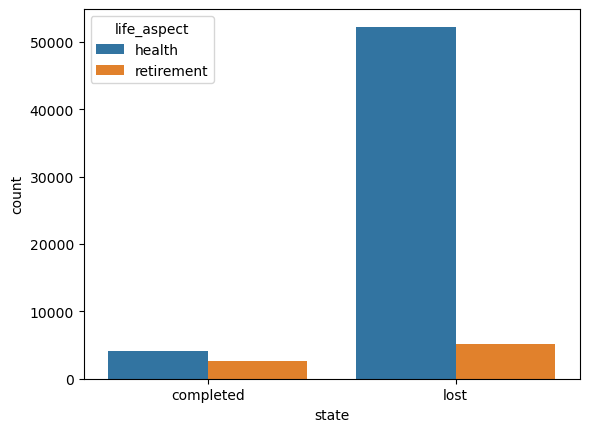

In [174]:
sns.countplot(data=df, x=df.state, hue=df.life_aspect)
# things missing

In [13]:
df.life_aspect.groupby(df.state).value_counts()

state             life_aspect
completed         health          4096
                  retirement      2651
created           health           149
                  retirement        46
initiation_phase  health            22
                  retirement         9
lost              health         71889
                  retirement      5946
offer_phase       health           136
                  retirement        12
Name: count, dtype: int64

## category_name

In [102]:
df[df.category_name.isna()].id.groupby(df.state).count()

Series([], Name: id, dtype: int64)

In [143]:
df[df.category_name.isna()]

,id,state,created_at,assign_at,complete_at,lost_at,consultant_id,life_aspect,category_name,customer_id,...,gender,age,family_status,kids,income,mkt_channel,employment,city,count_phone_calls,category_name_new
22983,318001,lost,2020-05-04 13:23:18,NaN,NaN,2020-05-19 15:22:56,346.0,health,NaN,9423,...,female,28.0,single,No,32000.0,Search,Employees,Berlin,NaN,Company pension scheme
25720,268799,lost,2020-01-17 15:15:12,NaN,NaN,2020-01-20 09:41:54,284.0,health,NaN,18291,...,male,52.0,married,No,NaN,Partnership (non rev share),Employees,Budenheim,NaN,Supplementary hospitalisation insurance
28288,236888,lost,2019-10-22 19:33:46,2019-10-23 08:26:17,NaN,2019-12-10 17:58:07,283.0,health,NaN,19562,...,female,54.0,single,No,36000.0,Organic,Employees,Losheim am See,4.0,Private pension
35860,309182,completed,2020-04-14 17:59:03,NaN,2020-04-15 07:56:19,NaN,246.0,health,NaN,2381,...,female,21.0,in partnership,No,27500.0,Promotions,Employees,Wemding,1.0,Supplementary private health insurance
36628,199428,completed,2019-07-30 13:35:48,NaN,2019-07-30 15:08:33,NaN,132.0,health,NaN,58156,...,female,36.0,NaN,NaN,NaN,Display,Others,Leichlingen,NaN,<NA>
37119,197504,completed,2019-07-25 14:03:35,NaN,2019-07-26 08:20:53,NaN,271.0,health,NaN,59021,...,male,29.0,in partnership,No,57945.0,Organic,Employees,Ketsch,0.0,Occupational disability insurance
38041,190150,completed,2019-07-09 09:43:59,NaN,2019-07-11 12:31:21,NaN,284.0,health,NaN,57916,...,male,37.0,married,No,71000.0,Organic,Employees,Neuss,NaN,Supplementary outpatient health insurance
38060,200307,completed,2019-08-01 09:14:15,NaN,2019-08-02 07:20:16,NaN,283.0,health,NaN,9107,...,male,55.0,married,Yes,120000.0,Partnership (non rev share),Self-employed / Freelancer,Aachen,NaN,Daily sickness benefits insurance
38416,289958,completed,2020-02-29 16:01:52,2020-03-02 10:13:13,2020-04-03 13:58:45,NaN,283.0,health,NaN,16115,...,male,42.0,married,No,120000.0,Partnership (non rev share),Employees,München,4.0,Supplementary dental insurance
40141,303635,completed,2020-04-01 15:21:59,NaN,2020-04-14 16:12:54,NaN,329.0,health,NaN,56164,...,female,30.0,in partnership,No,54000.0,Promotions,Employees,Potsdam,1.0,Statutory health insurance


In [96]:
# df.category_name.groupby(df.state).value_counts()

## customer_id

In [128]:
df.customer_id.groupby(df.state).nunique()

state
completed            5441
created               187
initiation_phase       31
lost                57408
offer_phase           148
Name: customer_id, dtype: int64

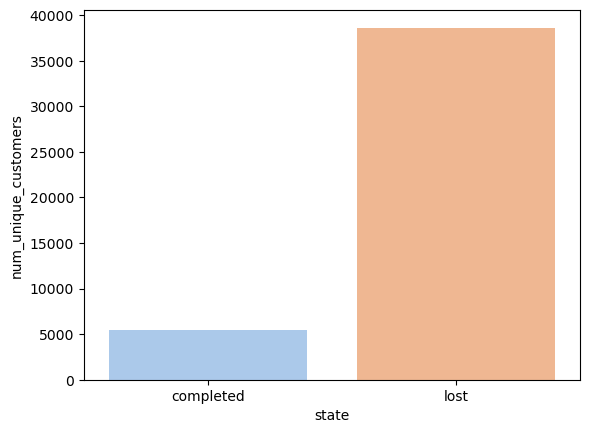

In [180]:
data = df.groupby('state')['customer_id'].nunique().reset_index(name='num_unique_customers')
sns.barplot(data=data, x='state', y='num_unique_customers', palette='pastel')
plt.show()


In [82]:
deals_per_customer = df['customer_id'].value_counts()
df['deals_per_customer'] = df['customer_id'].map(deals_per_customer)
df

,id,state,created_at,assign_at,complete_at,lost_at,consultant_id,life_aspect,category_name,customer_id,...,family_status,kids,income,mkt_channel,employment,city,count_phone_calls,deals_per_consultant,successful_deal_count,deals_per_customer
0,251436,completed,2019-11-29 10:44:35,NaN,2019-11-29 15:22:19,NaN,176.0,health,Occupational disability insurance,4534,...,married,Yes,75000.0,Partnership (non rev share),Employees,Altrip,NaN,1234,215,1
1,206158,completed,2019-08-16 07:51:02,NaN,2019-08-16 07:51:13,NaN,270.0,retirement,Funeral insurance,18032,...,NaN,NaN,NaN,Direct Sales,Others,Moers,NaN,88,50,3
2,336225,lost,2020-06-10 11:43:18,NaN,NaN,2020-06-17 17:20:24,0.0,retirement,Private pension,1,...,married,Yes,24000.0,Content Marketing,Retired,Oberding,NaN,1550,0,3
3,285420,lost,2020-02-21 13:28:53,NaN,NaN,2020-02-25 09:44:16,0.0,retirement,Funeral insurance,2,...,NaN,NaN,NaN,Organic,Others,NaN,NaN,1550,0,1
4,201806,lost,2019-08-05 09:04:08,NaN,NaN,2019-08-06 16:34:48,176.0,health,Occupational disability insurance,3,...,single,No,110000.0,Promotions,Employees,Frankfurt am Main,NaN,1234,215,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84951,197391,completed,2019-07-25 10:32:41,NaN,2019-07-25 10:32:48,NaN,197.0,retirement,Funeral insurance,60151,...,single,Yes,125000.0,Direct Sales,Others,Alzey,NaN,244,242,1
84952,251747,completed,2019-11-30 10:34:05,NaN,2019-12-23 07:36:36,NaN,120.0,health,Statutory health insurance,4819,...,in partnership,No,NaN,Display,Employees,Stuttgart,0.0,1252,886,4
84953,270361,completed,2020-01-21 11:50:35,NaN,2020-01-23 10:09:13,NaN,347.0,health,Occupational disability insurance,2694,...,in partnership,No,100000.0,Content Marketing,Self-employed / Freelancer,Bad Friedrichshall,2.0,1751,237,2
84954,258049,completed,2019-12-19 08:00:51,2019-12-19 08:00:51,2020-01-14 06:54:01,NaN,120.0,health,Statutory health insurance,15622,...,in partnership,No,60000.0,Organic,Employees,Frankfurt,0.0,1252,886,3


<Axes: xlabel='deals_per_customer', ylabel='count'>

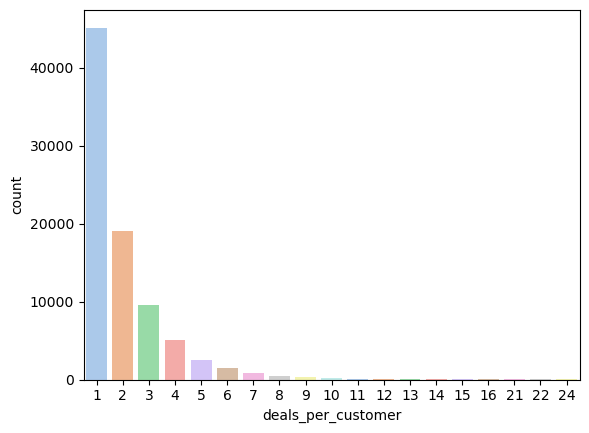

In [86]:
sns.countplot(data=df, x='deals_per_customer', palette='pastel')

## 'gender', 'family_status', 'kids', 'city'

In [133]:
cat = df[['state','gender', 'family_status', 'kids', 'city']]

In [134]:
df.gender.value_counts()

gender
male       64567
female     19820
company        2
Name: count, dtype: int64

In [135]:
df.gender.isna().sum()

567

In [156]:
### anmoly 
df = df.loc[~(df.gender == 'company')]

In [157]:
df['gender'] = df.groupby(['employment','life_aspect'])['gender'].transform(lambda x: x.fillna(x.mode()[0]))

In [158]:
df.genderr.value_counts()

genderr
male      65024
female    19930
Name: count, dtype: int64

In [159]:
# df.groupby(['employment','life_aspect'])['gender'].value_counts()

<Axes: xlabel='age', ylabel='Count'>

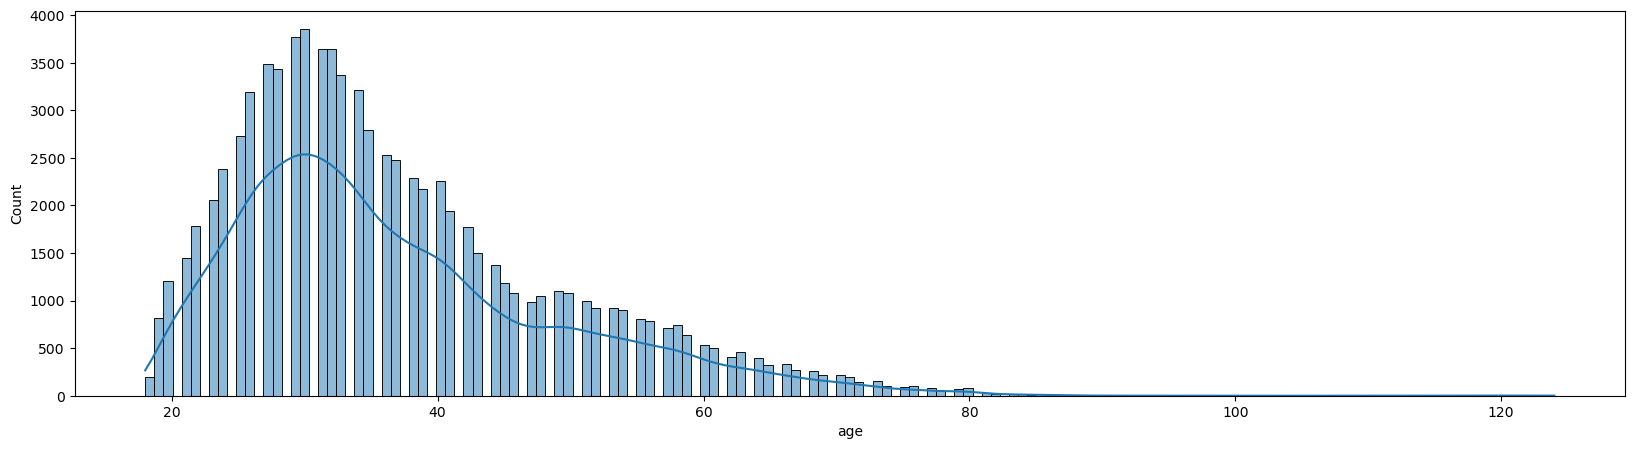

In [171]:
plt.figure(figsize=(20,5))

sns.histplot(data=df, x='age', palette='pastel', kde=True)

In [160]:
df.age.value_counts()

age
30.0     3854
29.0     3773
31.0     3649
32.0     3642
27.0     3491
         ... 
94.0        1
93.0        1
100.0       1
98.0        1
89.0        1
Name: count, Length: 85, dtype: int64

In [152]:
df.age.isna().sum()

574

In [172]:
bins = [0, 25, 35, 45, float('inf')] 
labels = ['0-25', '26-35', '36-40', '41+'] 

df['age_bracket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [175]:
df['age_bracket'] = df.groupby(['employment','life_aspect'])['age_bracket'].transform(lambda x: x.fillna(x.mode()[0]))

<Axes: xlabel='age_bracket', ylabel='count'>

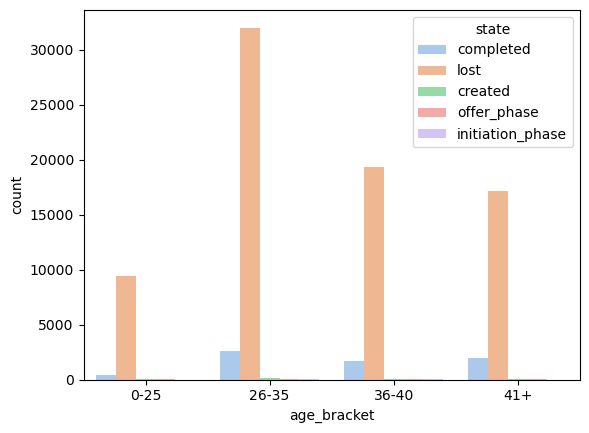

In [187]:
sns.countplot(data=df, x='age_bracket', palette='pastel', hue=df.state)

In [177]:
df.family_status.value_counts()

family_status
in partnership    23860
married           20948
single            19260
Name: count, dtype: int64

In [178]:
df.family_status.isna().sum()

20886

In [181]:
df.family_status.isna().groupby(df.state).sum()

state
completed            1555
created                 6
initiation_phase        1
lost                19303
offer_phase            21
Name: family_status, dtype: int64

In [191]:
df['family_status'] = df['family_status'].fillna('Unknown')

<Axes: xlabel='family_status', ylabel='count'>

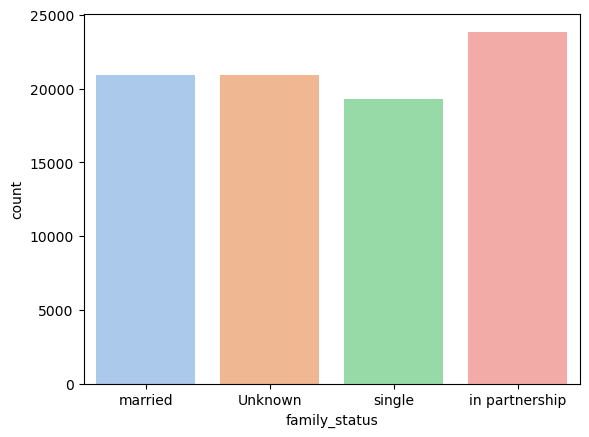

In [194]:
sns.countplot(data=df, x='family_status', palette='pastel')

In [197]:
df.kids.isna().sum()

20932

In [187]:
df.kids.value_counts()

kids
No     39802
Yes    22700
Name: count, dtype: int64

In [198]:
df['kids'] = df['kids'].fillna('Unknown')

<Axes: xlabel='kids', ylabel='count'>

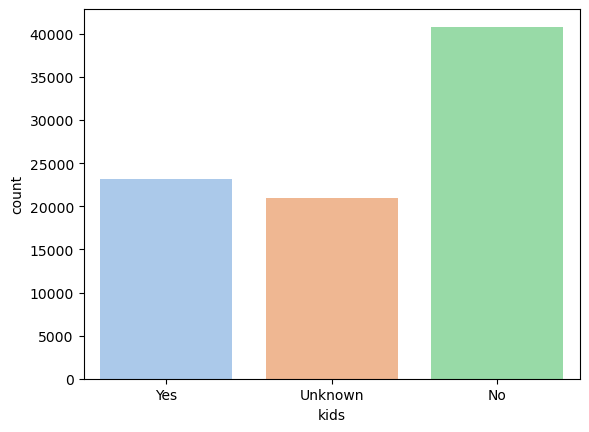

In [201]:
sns.countplot(data=df, x='kids', palette='pastel')

## income, count_phone_calls,

In [203]:
df.income.value_counts()
df.income.isna().sum()

21526

In [230]:
df.income.isna().groupby(df.state).sum()

state
completed            1748
created                11
initiation_phase        1
lost                19742
offer_phase            25
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='Count'>

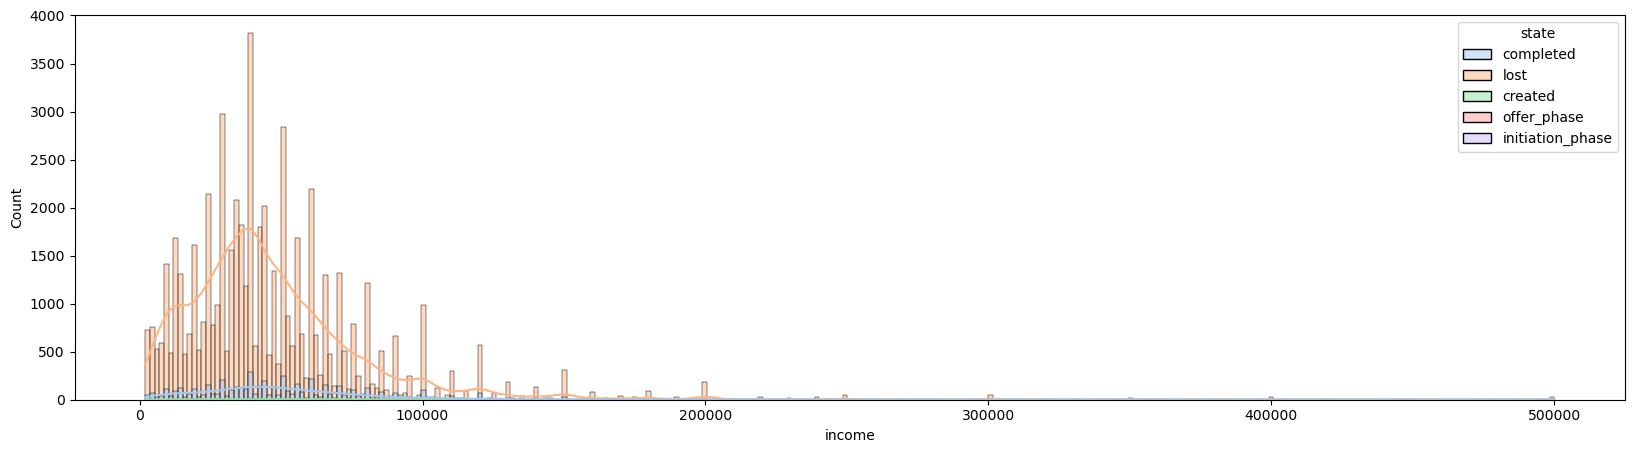

In [228]:
plt.figure(figsize=(20,5))

sns.histplot(data=df, x='income', palette='pastel', kde=True, hue=df.state)

In [229]:
df.groupby(['state'])['income'].median()

state
completed           45732.0
created             40500.0
initiation_phase    49600.0
lost                40000.0
offer_phase         52000.0
Name: income, dtype: float64

In [231]:
df['income'].median()

40300.0

In [251]:
df['income'] = df.groupby(['employment'])['income'].transform(lambda x: x.fillna(x.mode()))
# df['income'] = df['income'].fillna(df.income.median())

<Axes: xlabel='income', ylabel='Count'>

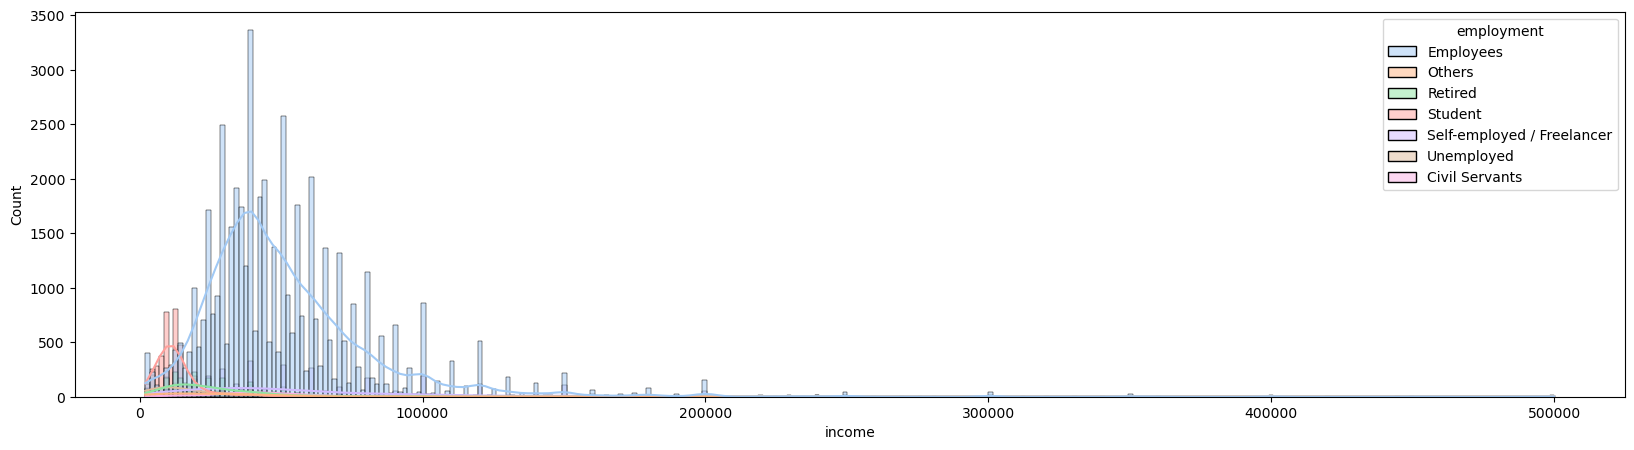

In [252]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='income', palette='pastel', kde=True, hue=df.employment)

In [248]:
df.groupby(['employment'])['income'].median()

employment
Civil Servants                40000.0
Employees                     45000.0
Others                        24000.0
Retired                       20020.0
Self-employed / Freelancer    45000.0
Student                       11990.0
Unemployed                    13608.0
Name: income, dtype: float64

## mkt_channel

In [145]:
df.mkt_channel.value_counts()

mkt_channel
Organic                        18784
Display                        14732
Partnership (rev share)        10005
Partnership (non rev share)     8830
Content Marketing               8790
Facebook                        7163
Promotions                      4835
Direct Sales                    3441
Podcast                         2450
Search                          2093
Offline                         1799
Other Paid                       676
Broker Buying                    591
Influencer                       549
Digital Incent                   129
Email                             53
Test                              25
Print                             11
Name: count, dtype: int64

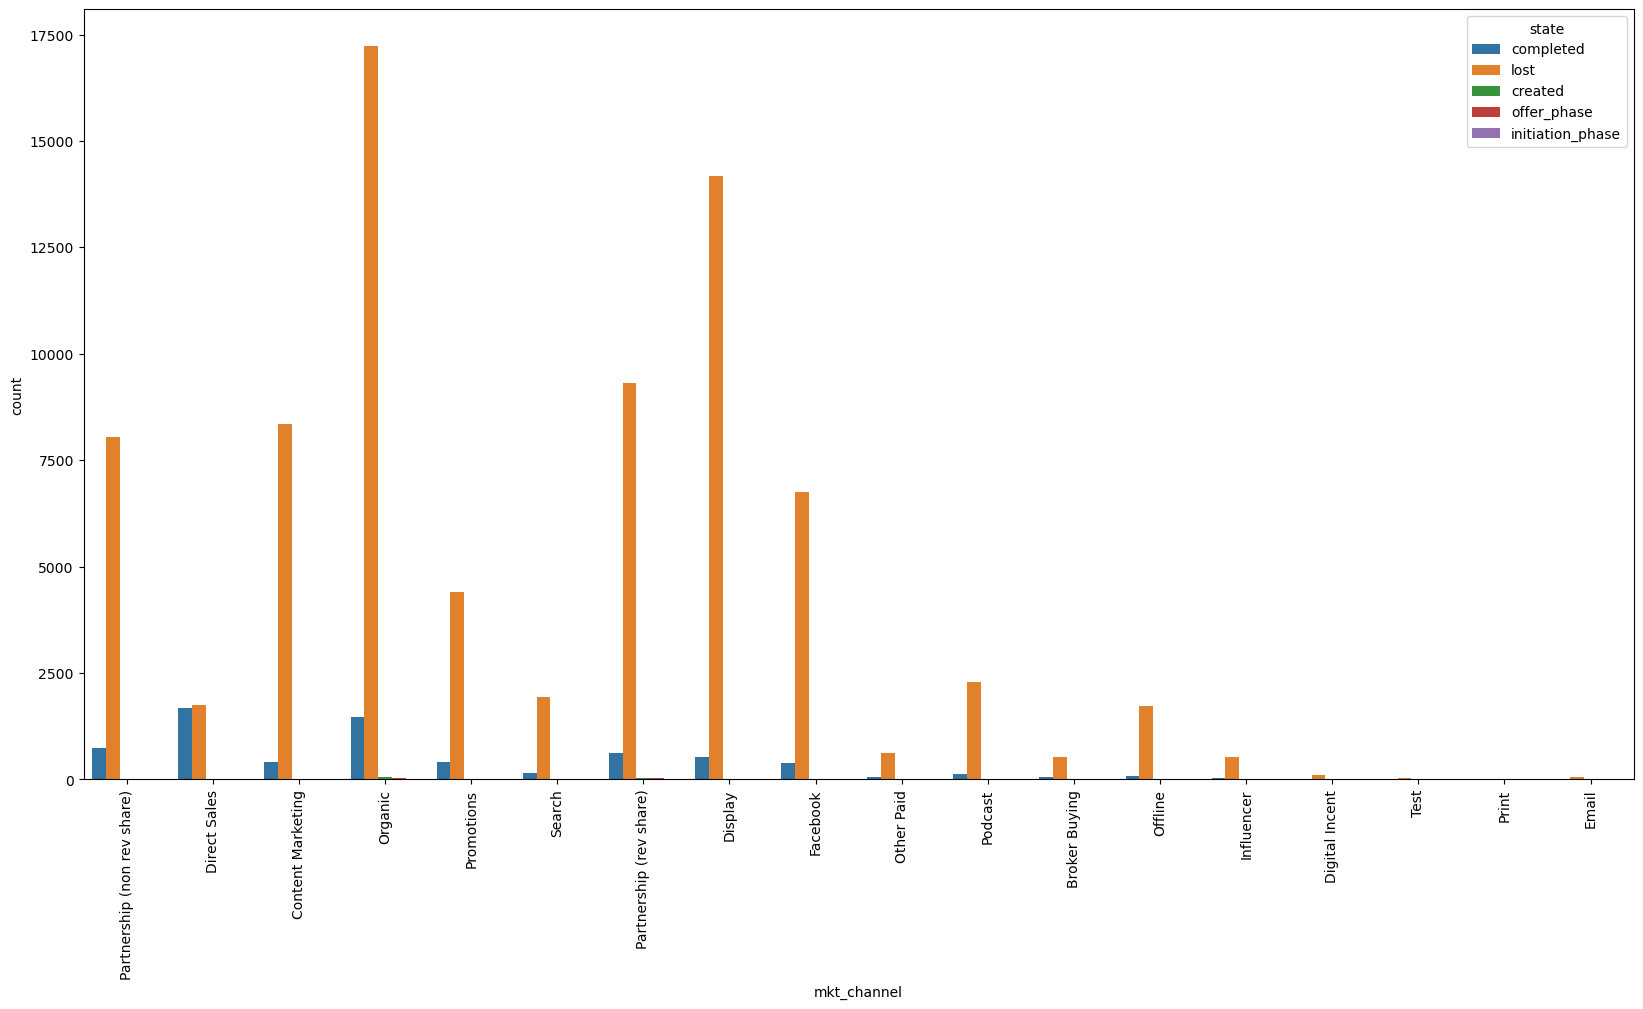

In [152]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.mkt_channel, hue=df.state)
plt.xticks(rotation=90, fontsize=10) 
plt.show()

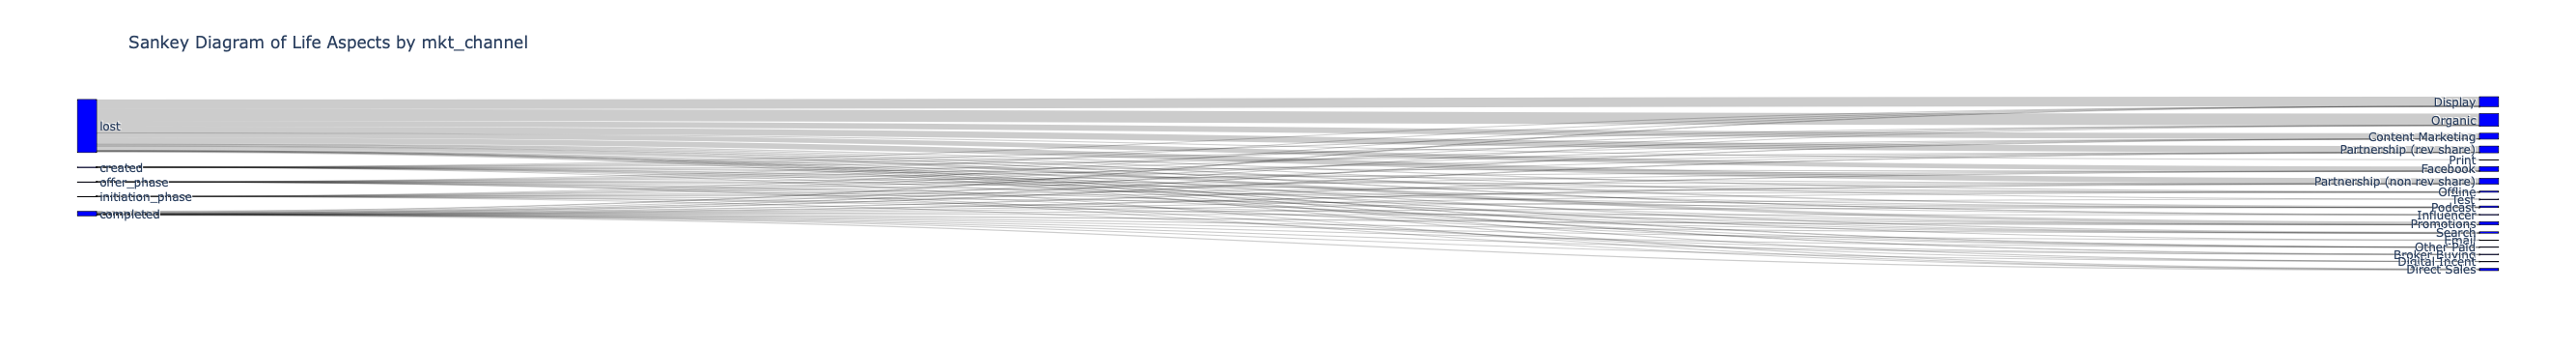

In [106]:
import plotly.graph_objects as go

# Assuming df is your DataFrame
# Assuming 'life_aspect' and 'state' are columns in df

# Count occurrences of each combination of 'life_aspect' and 'state'
sankey_data = df.groupby(['state', 'mkt_channel']).size().reset_index(name='count')

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sankey_data['state'].unique().tolist() + sankey_data['mkt_channel'].unique().tolist(),
        color="blue"
    ),
    link=dict(
        source=sankey_data['state'].map(lambda x: sankey_data['state'].unique().tolist().index(x)),
        target=sankey_data['mkt_channel'].map(lambda x: len(sankey_data['state'].unique().tolist()) + 
                                                      sankey_data['mkt_channel'].unique().tolist().index(x)),
        value=sankey_data['count'],
    ))])

fig.update_layout(title_text="Sankey Diagram of Life Aspects by mkt_channel")
fig.show()


## employment

In [154]:
df.employment.value_counts()

employment
Employees                     51203
Others                        18865
Student                        4932
Self-employed / Freelancer     4127
Retired                        2696
Unemployed                     2070
Civil Servants                 1063
Name: count, dtype: int64

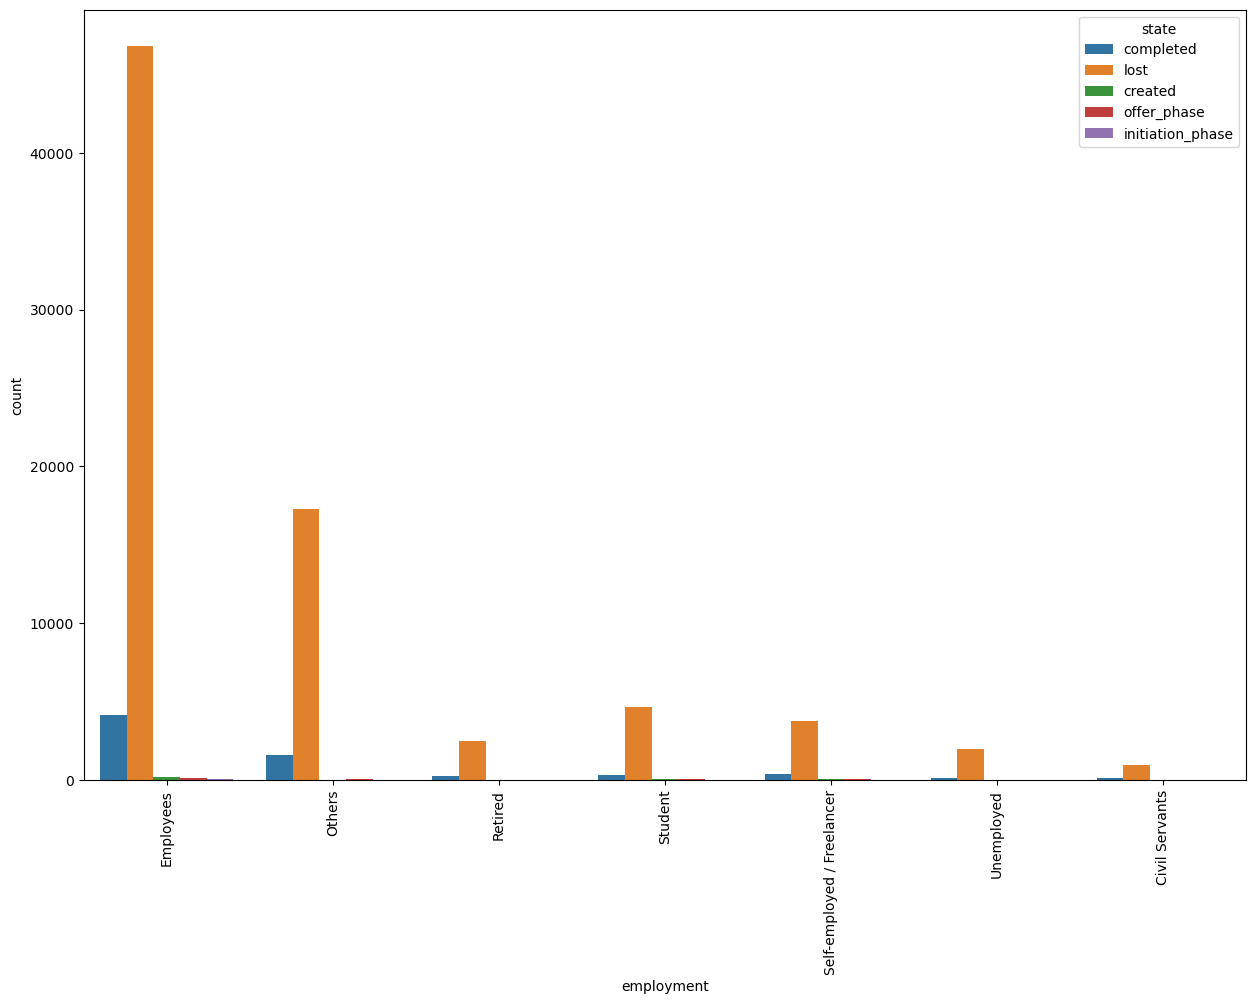

In [156]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x=df.employment, hue=df.state)
plt.xticks(rotation=90, fontsize=10) 
plt.show()

## city

In [275]:
df.city.value_counts().head(10)

city
Berlin        5918
München       3239
Hamburg       2952
Köln          1614
Frankfurt     1173
Düsseldorf    1095
Stuttgart      998
Leipzig        776
Dresden        739
Essen          717
Name: count, dtype: int64

In [276]:
top_7cities = df['city'].value_counts().head(7).index

df.loc[~df['city'].isin(top_7cities), 'city'] = 'Others'
df['city'] = df['city'].fillna('Others')


In [277]:
df.city.isna().groupby(df.state).sum()

state
completed           0
created             0
initiation_phase    0
lost                0
offer_phase         0
Name: city, dtype: int64

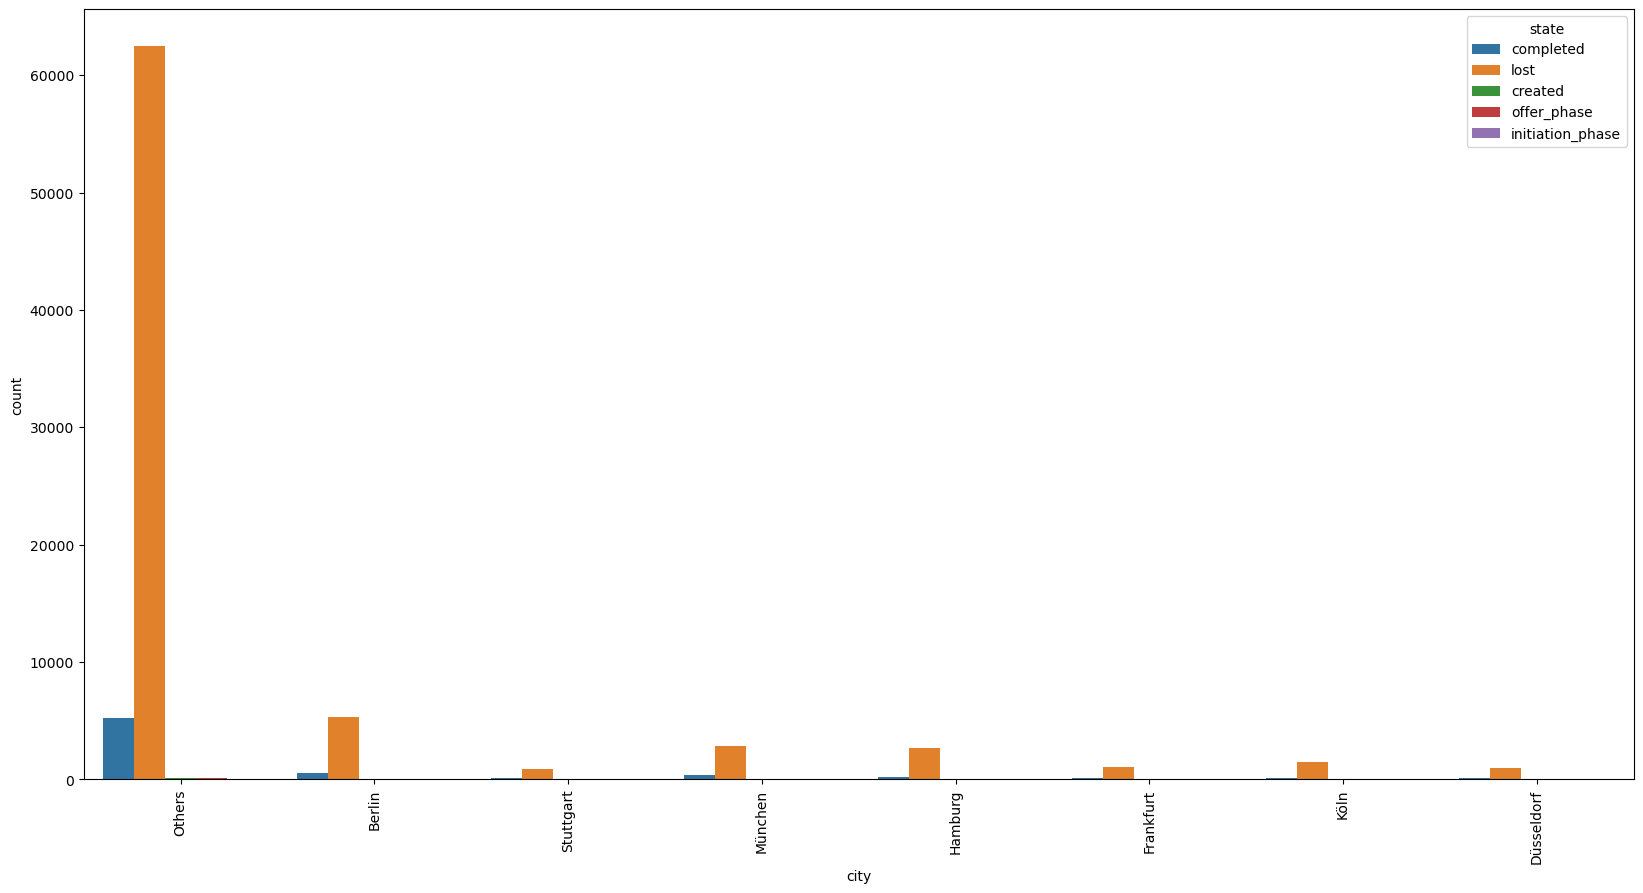

In [278]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.city, hue=df.state)
plt.xticks(rotation=90, fontsize=10) 
plt.show()

## count_phone_calls

In [295]:
df.count_phone_calls.value_counts()

count_phone_calls
0.0     56403
1.0      5418
2.0      4458
3.0      3571
4.0      2884
6.0      2545
5.0      2529
7.0      1528
8.0      1009
9.0       629
10.0      381
11.0      231
12.0      172
13.0       98
14.0       61
15.0       50
16.0       38
17.0       16
18.0       12
21.0        7
19.0        5
22.0        4
20.0        3
26.0        2
28.0        2
25.0        2
37.0        1
23.0        1
24.0        1
Name: count, dtype: int64

In [296]:
df.count_phone_calls.isna().sum()

2895

In [22]:
df.count_phone_calls.isna().groupby(df.state).sum()

state
completed           2285
created                0
initiation_phase       1
lost                 608
offer_phase            1
Name: count_phone_calls, dtype: int64

In [23]:
df.count_phone_calls.groupby(df.state).sum()

state
completed           10748.0
created               390.0
initiation_phase      100.0
lost                90248.0
offer_phase           462.0
Name: count_phone_calls, dtype: float64

In [24]:
df['count_phone_calls'] = df.groupby(['state'])['count_phone_calls'].transform(lambda x: x.fillna(x.mode()[0]))

In [25]:
df.count_phone_calls.isna().sum()

0

### Features

In [20]:
df.drop(columns=['id', 'created_at',	'assign_at',	'complete_at'	,'lost_at', 'registered_at'], inplace=True)
df = df.loc[(df.state=='completed')|((df.state=='lost')&(~df.consultant_id.isna())&(~df.family_status.isna())&(~df.kids.isna())&(~df.city.isna()))]
# df['category_name'] = df.groupby(['mkt_channel','state'])['category_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))
df['category_name'] = df.groupby(['customer_id'])['category_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))
df['category_name'] = df.groupby(['customer_id'])['category_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))


In [10]:
df.drop(columns=['days_to_assign'], inplace=True)


In [26]:
df[df.category_name.isna()]

,state,consultant_id,life_aspect,category_name,customer_id,gender,age,family_status,kids,income,mkt_channel,employment,city,count_phone_calls,dormancy_days,processing_days


In [25]:
# Impute <NA> values in 'category_name' with mode
df['category_name'] = df['category_name'].fillna(df['category_name'].mode()[0])


In [28]:
df.state.value_counts()

state
lost         57319
completed     6747
Name: count, dtype: int64

In [31]:
X = df.loc[:, df.columns != 'state']

In [32]:
y = df['state']

In [45]:
df.nunique() 

state                    2
consultant_id           68
life_aspect              2
category_name           48
customer_id          41458
gender                   3
age                     78
family_status            3
kids                     2
income                2373
mkt_channel             18
employment               7
city                  6819
count_phone_calls       29
dormancy_days         1472
processing_days        190
dtype: int64